 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

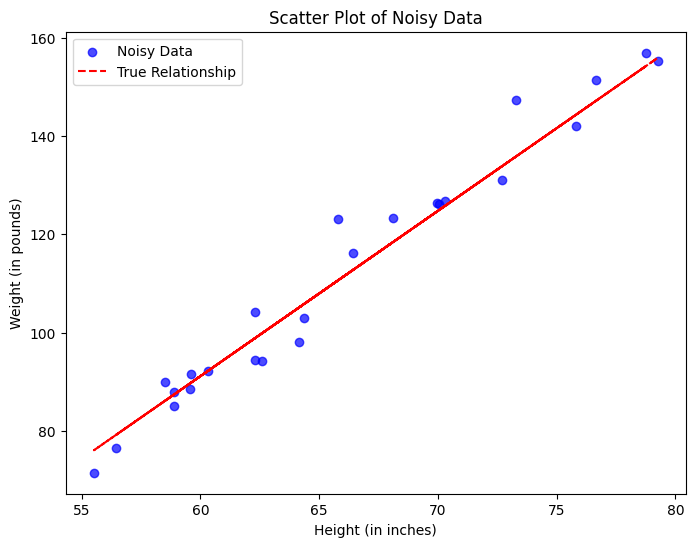

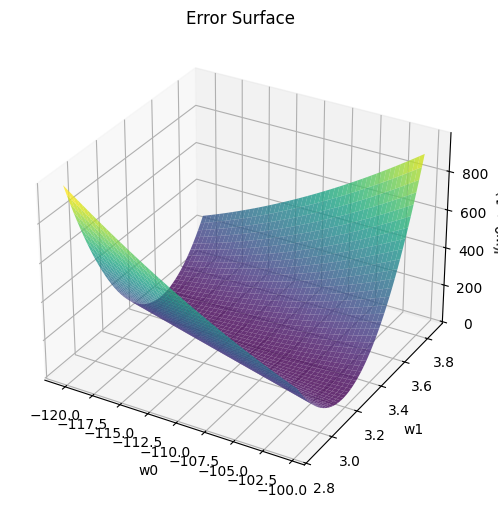

Estimated parameters: w0 = -121.69, w1 = 3.54


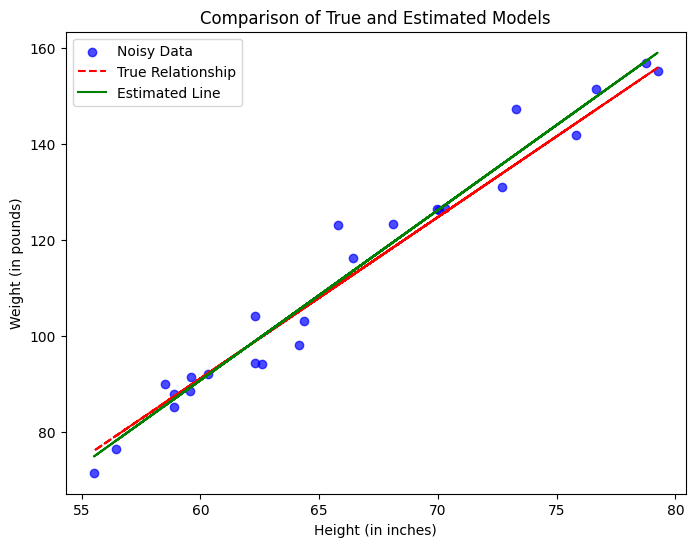

True parameters: w0 = -110.42, w1 = 3.36
Estimated parameters from least squares: w0 = -121.69, w1 = 3.54


In [ ]:
#Understanding Error Surface
###############################################part 1 ############
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

########################################
#Generate meaningfull data
########################################
np.random.seed(42)
x = np.random.uniform(55, 80, 25)
true_w0, true_w1 = -110.42, 3.36
noise = np.random.normal(0, np.sqrt(20), 25)
t = true_w0 + true_w1 * x + noise

########################################
#Plot scatter plot of data
########################################
plt.figure(figsize=(8, 6))
plt.scatter(x, t, label="Noisy Data", color='blue', alpha=0.7)
plt.plot(x, true_w1 * x + true_w0, label="True Relationship", color='red', linestyle='dashed')
plt.xlabel("Height (in inches)")
plt.ylabel("Weight (in pounds)")
plt.title("Scatter Plot of Noisy Data")
plt.legend()
plt.show()


########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################
#Sample a bunch of w's around w_opt and compute the associated error



#Compute the error
def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
    #Estimate the target
    w0, w1 = w[0], w[1]
    y_est = w0 + w1 * x
    error = 0.5 * np.mean((y_est - t) ** 2)

    #Compute and return the error
    return error


#Plot 3D error surface and the corresponding contour plots
#Error surface is a function of w0 and w1
w0_values = np.linspace(true_w0 - 10, true_w0 +10, 50)
w1_values = np.linspace(true_w1 - 0.5, true_w1 +0.5, 50)
W0, W1 = np.meshgrid(w0_values, w1_values)
J = np.zeros(W0.shape)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        J[i, j] = Error([W0[i, j], W1[i, j]], t, x)


#Locate the minima of the error surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J, cmap='viridis', alpha=0.8)
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("J(w0, w1)")
ax.set_title("Error Surface")
plt.show()



########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    X = np.vstack((np.ones_like(x), x)).T
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ t
    return w_opt


#Estimate optimal weight's using "LinearRegression" function

w_opt = LinearRegression(x, t)
print(f"Estimated parameters: w0 = {w_opt[0]:.2f}, w1 = {w_opt[1]:.2f}")

#Estimate the targets using the input x and the estimated weights

targets_estimated = w_opt[1] * x + w_opt[0]

#Plot the estimated line on top of the above scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, t, label="Noisy Data", color='blue', alpha=0.7)
plt.plot(x, true_w1 * x + true_w0, label="True Relationship", color='red', linestyle='dashed')
plt.plot(x, targets_estimated, label="Estimated Line", color='green')
plt.xlabel("Height (in inches)")
plt.ylabel("Weight (in pounds)")
plt.title("Comparison of True and Estimated Models")
plt.legend()
plt.show()


########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
print(f"True parameters: w0 = {true_w0}, w1 = {true_w1}")
print(f"Estimated parameters from least squares: w0 = {w_opt[0]:.2f}, w1 = {w_opt[1]:.2f}")





<b> Report your observations </b>

1.The least squares method provides values of
𝑤
0
w
0
​
  and
𝑤
1
w
1
​
  that are close to the true parameters (
−
110.42
,
3.36
−110.42,3.36), indicating that the model effectively learns the relationship despite the noise.

2.The plotted error surface shows a clear minimum, and the estimated parameters from least squares correspond to this point.
This validates that minimizing the squared error successfully finds the optimal regression coefficients.

3.While individual points deviate due to noise, the general trend aligns with the original function, confirming that linear regression effectively models the relationship.



Training data: [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421]
Testing data: [0.52631579 0.57894737 0.63157895 0.68421053 0.73684211 0.78947368
 0.84210526 0.89473684 0.94736842 1.        ]
Model order: 0
Training Error: 0.3499
Testing Error: 1.3759
Model order: 1
Training Error: 0.3451
Testing Error: 1.5693
Model order: 2
Training Error: 0.0716
Testing Error: 4.1517
Model order: 3
Training Error: 0.0712
Testing Error: 4.7441
Model order: 4
Training Error: 0.0673
Testing Error: 5.7165
Model order: 5
Training Error: 0.0670
Testing Error: 23.6657
Model order: 6
Training Error: 0.0357
Testing Error: 1054.5287
Model order: 7
Training Error: 0.0354
Testing Error: 1667.1968
Model order: 8
Training Error: 0.0004
Testing Error: 43430.9162
Model order: 9
Training Error: 0.0001
Testing Error: 37282.7517


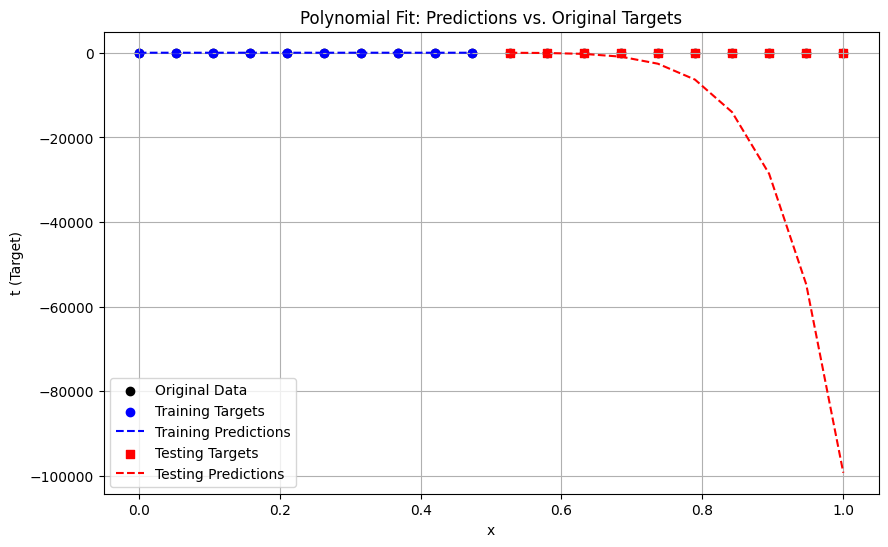

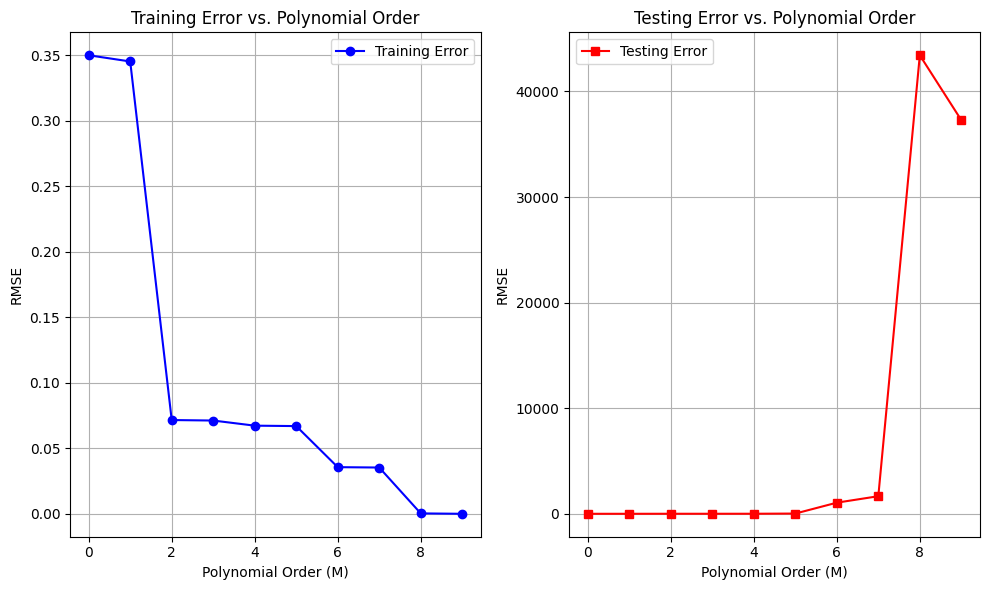

Model Order: 0
Training Error (50 pts): 0.3093
Testing Error (50 pts): 1.2771
Model Order: 1
Training Error (50 pts): 0.3093
Testing Error (50 pts): 1.2574
Model Order: 2
Training Error (50 pts): 0.0912
Testing Error (50 pts): 3.6379
Model Order: 3
Training Error (50 pts): 0.0892
Testing Error (50 pts): 5.0928
Model Order: 4
Training Error (50 pts): 0.0876
Testing Error (50 pts): 1.4781
Model Order: 5
Training Error (50 pts): 0.0868
Testing Error (50 pts): 24.9449
Model Order: 6
Training Error (50 pts): 0.0841
Testing Error (50 pts): 206.8831
Model Order: 7
Training Error (50 pts): 0.0838
Testing Error (50 pts): 631.2878
Model Order: 8
Training Error (50 pts): 0.0838
Testing Error (50 pts): 1384.0793
Model Order: 9
Training Error (50 pts): 0.0820
Testing Error (50 pts): 33064.6065


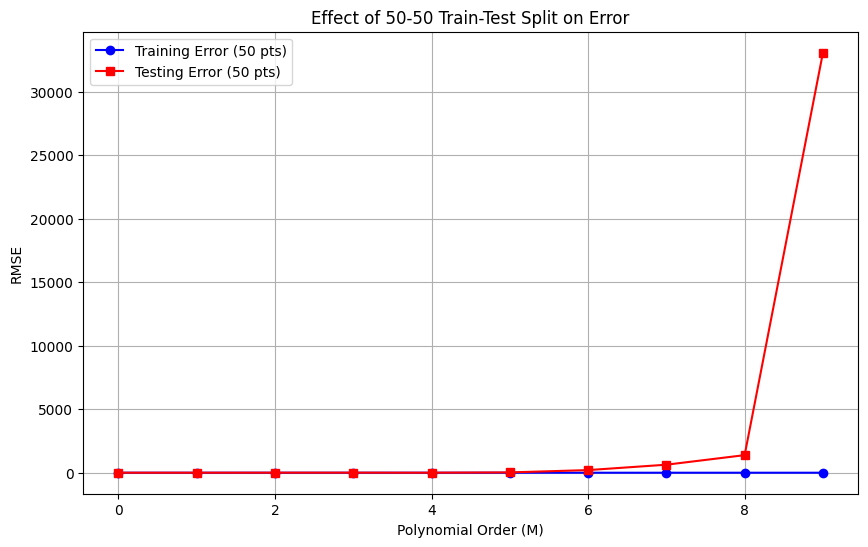

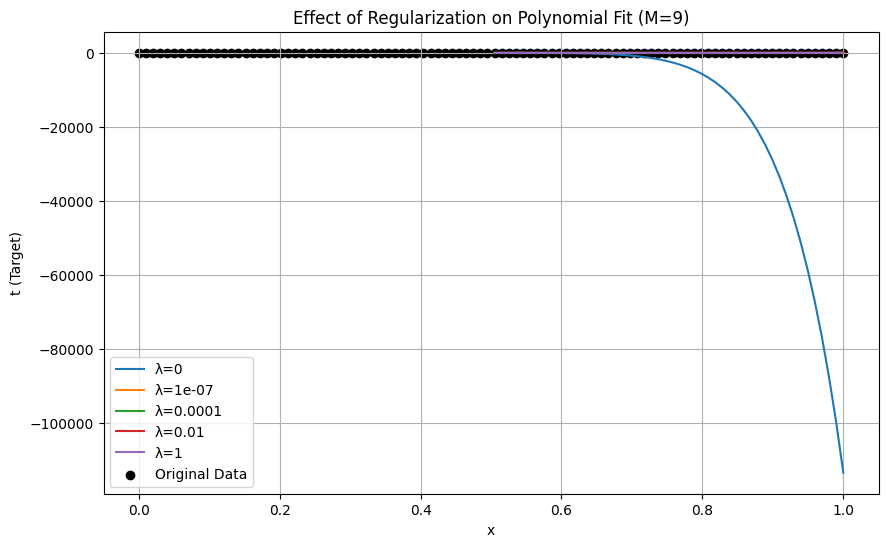

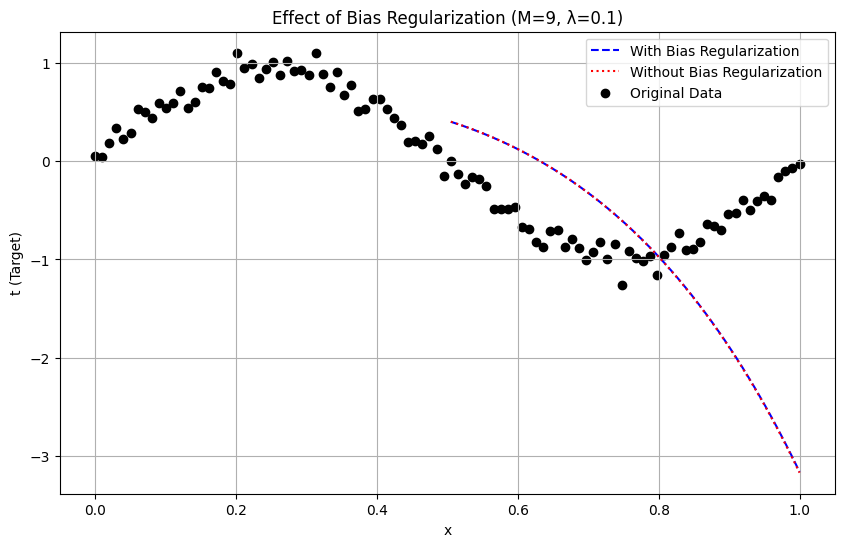

Polynomial Coefficients (Without Regularization):
 [ 4.43886134e-02  1.16075211e+00  3.72257826e+02 -8.66589822e+03
  9.21940854e+04 -5.39610163e+05  1.84606413e+06 -3.68696355e+06
  3.98630114e+06 -1.80318238e+06]
Polynomial Coefficients (With Regularization):
 [ 0.52459503  1.12620864 -1.68634015 -1.42840098 -0.84619995 -0.44761861
 -0.22546859 -0.11087228 -0.05384251 -0.02597553]

Training Error Without Regularization: 0.0820
Testing Error Without Regularization: 33064.6065
Training Error With Regularization: 0.2512
Testing Error With Regularization: 1.1858


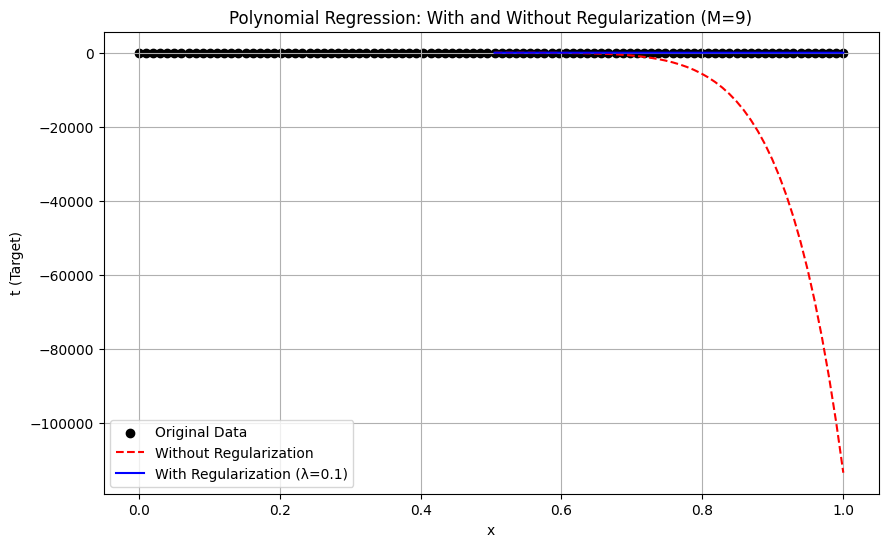

In [ ]:
#Understanding model order and overfitting
##########################################################part 2##############
########################################
#Generate 20 data points
########################################

np.random.seed(42)
x = np.linspace(0, 1, 20)
noise = np.random.normal(0, 0.1, x.shape)
t = np.sin(2 * np.pi * x) + noise

#Obtain train and test splits
X_train, X_test = x[:10], x[10:]
Y_train, Y_test = t[:10], t[10:]

print("Training data:", X_train)
print("Testing data:", X_test)

########################################
#Fitting Mth degree polynomial using least squares approach
########################################
#Complete the function
def PolynomialFit(X_train,Y_train,M,lamda): #(training data, trining targets, Model order, Regularization coefficient)
    #Transform the data using polynomial kernel
    X_train = np.vander(X_train, M + 1, increasing=True)
    reg_matrix = lamda * np.eye(M+1)

    #Find Pseudo inverse solution
    w_opt = np.linalg.inv(X_train.T @ X_train + lamda * np.eye(M+1)) @ X_train.T @ Y_train

    #return the weight vector
    return w_opt

#Complete the function
def PolynomialPred(w_est,X_train,X_test): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    M = len(w_est) - 1
    X_training_set = np.vander(X_train, M + 1, increasing=True)
    X_testing_set = np.vander(X_test, M + 1, increasing=True)

    Y_training_predictions = X_training_set @ w_est
    Y_testing_predictions = X_testing_set @ w_est

    #Return training and testing predictions
    return Y_training_predictions, Y_testing_predictions

#Complete the function
def PolynomialPred_Error(w_est,X_train,X_test,Y_train,Y_test): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    Y_train_pred,Y_test_pred = PolynomialPred(w_est,X_train,X_test)

    # print("Training predictions:", Y_train_pred)
    # print("Testing predictions:", Y_test_pred)

    TrainError = np.sqrt(np.mean((Y_train_pred - Y_train) ** 2))
    TestError = np.sqrt(np.mean((Y_test_pred - Y_test) ** 2))
    #Return training and testing error
    return TrainError,TestError

#Iterate through range of M values
M_range=list(range(10))
TrError = []
TeError = []
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
    w_opt = PolynomialFit(X_train,Y_train,M,0)

    #Predict training and testing targets
    Y_train_prediction, Y_test_prediction = PolynomialPred(w_opt,X_train,X_test)

    #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
    train_error , test_error = PolynomialPred_Error(w_opt,X_train,X_test,Y_train,Y_test)

    #Store them for plotting
    TrError.append(train_error)
    TeError.append(test_error)

    print(f"Model order: {M}")
    print(f"Training Error: {train_error:.4f}")
    print(f"Testing Error: {test_error:.4f}")

#Plot training and testing estimates alogwith the original targets

plt.figure(figsize=(10, 6))

# Scatter plot of original data points
plt.scatter(x, t, label="Original Data", color="black", marker="o")

# Plot the training data predictions
plt.scatter(X_train, Y_train, label="Training Targets", color="blue", marker="o")
plt.plot(X_train, Y_train_prediction, label="Training Predictions", color="blue", linestyle="dashed")

# Plot the testing data predictions
plt.scatter(X_test, Y_test, label="Testing Targets", color="red", marker="s")
plt.plot(X_test, Y_test_prediction, label="Testing Predictions", color="red", linestyle="dashed")

plt.xlabel("x")
plt.ylabel("t (Target)")
plt.title("Polynomial Fit: Predictions vs. Original Targets")
plt.legend()
plt.grid(True)

plt.show()


#Plot training error vs polynomial order, and testing error vs polynomial order
plt.figure(figsize=(10, 6))

# Plot training error
plt.subplot(1, 2, 1)
plt.plot(M_range, TrError, label='Training Error', marker='o', color='blue')
plt.xlabel('Polynomial Order (M)')
plt.ylabel('RMSE')
plt.title('Training Error vs. Polynomial Order')
plt.legend()
plt.grid(True)

# Plot testing error
plt.subplot(1, 2, 2)
plt.plot(M_range, TeError, label='Testing Error', marker='s', color='red')
plt.xlabel('Polynomial Order (M)')
plt.ylabel('RMSE')
plt.title('Testing Error vs. Polynomial Order')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################

np.random.seed(42)
x_large = np.linspace(0, 1, 100)
noise_large = np.random.normal(0, 0.1, x_large.shape)
t_large = np.sin(2 * np.pi * x_large) + noise_large

# 50-50 train-test split
split_idx = len(x_large) // 2  # 50% split
X_train_large, X_test_large = x_large[:split_idx], x_large[split_idx:]
Y_train_large, Y_test_large = t_large[:split_idx], t_large[split_idx:]

# Function: Polynomial Fit with Regularization
def PolynomialFit(X_train, Y_train, M, lamda):
    X_train_poly = np.vander(X_train, M + 1, increasing=True)
    reg_matrix = lamda * np.eye(M + 1)
    w_opt = np.linalg.inv(X_train_poly.T @ X_train_poly + reg_matrix) @ X_train_poly.T @ Y_train
    return w_opt

# Function: Polynomial Prediction
def PolynomialPred(w_est, X_train, X_test):
    M = len(w_est) - 1
    X_train_poly = np.vander(X_train, M + 1, increasing=True)
    X_test_poly = np.vander(X_test, M + 1, increasing=True)
    Y_train_pred = X_train_poly @ w_est
    Y_test_pred = X_test_poly @ w_est
    return Y_train_pred, Y_test_pred

# Function: Compute Errors
def PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test):
    Y_train_pred, Y_test_pred = PolynomialPred(w_est, X_train, X_test)
    TrainError = np.sqrt(np.mean((Y_train_pred - Y_train) ** 2))
    TestError = np.sqrt(np.mean((Y_test_pred - Y_test) ** 2))
    return TrainError, TestError

# Iterate through model orders with increased dataset
M_range = list(range(10))
TrError_large, TeError_large = [], []

for M in M_range:
    w_opt_large = PolynomialFit(X_train_large, Y_train_large, M, 0)
    Y_train_pred_large, Y_test_pred_large = PolynomialPred(w_opt_large, X_train_large, X_test_large)
    train_error_large, test_error_large = PolynomialPred_Error(w_opt_large, X_train_large, X_test_large, Y_train_large, Y_test_large)

    TrError_large.append(train_error_large)
    TeError_large.append(test_error_large)

    print(f"Model Order: {M}")
    print(f"Training Error (50 pts): {train_error_large:.4f}")
    print(f"Testing Error (50 pts): {test_error_large:.4f}")

# Plot: Training & Testing Error for Increased Dataset
plt.figure(figsize=(10, 6))
plt.plot(M_range, TrError_large, label="Training Error (50 pts)", marker="o", color="blue")
plt.plot(M_range, TeError_large, label="Testing Error (50 pts)", marker="s", color="red")
plt.xlabel("Polynomial Order (M)")
plt.ylabel("RMSE")
plt.title("Effect of 50-50 Train-Test Split on Error")
plt.legend()
plt.grid(True)
plt.show()



########################################
#Effect of regularization
########################################
#Consider a set of lambda's. For example: lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]
#Repeat the experiments, i.e., plot the prediction and error in predictions with respect to model order. Contrast these results with those obtained without regularization.

lamdas = [0, 1e-7, 1e-4, 1e-2, 1]
M = 9  # Choose a high polynomial order to see regularization effects
plt.figure(figsize=(10, 6))

for lamda in lamdas:
    w_opt_reg = PolynomialFit(X_train_large, Y_train_large, M, lamda)
    Y_train_pred_reg, Y_test_pred_reg = PolynomialPred(w_opt_reg, X_train_large, X_test_large)

    plt.plot(X_test_large, Y_test_pred_reg, label=f"λ={lamda}")

# Scatter original data
plt.scatter(x_large, t_large, label="Original Data", color="black", marker="o")
plt.xlabel("x")
plt.ylabel("t (Target)")
plt.title(f"Effect of Regularization on Polynomial Fit (M={M})")
plt.legend()
plt.grid(True)
plt.show()




########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
#Generate data

def PolynomialFit_Bias(X_train, Y_train, M, lamda):
    X_train_poly = np.vander(X_train, M + 1, increasing=True)
    reg_matrix = lamda * np.eye(M + 1)
    reg_matrix[0, 0] = 0  # Do not regularize bias term
    w_opt = np.linalg.inv(X_train_poly.T @ X_train_poly + reg_matrix) @ X_train_poly.T @ Y_train
    return w_opt

# Compare with and without bias regularization
lamda = 0.1
w_opt_with_bias = PolynomialFit_Bias(X_train_large, Y_train_large, M, lamda)
w_opt_without_bias = PolynomialFit(X_train_large, Y_train_large, M, lamda)

Y_train_pred_with_bias, Y_test_pred_with_bias = PolynomialPred(w_opt_with_bias, X_train_large, X_test_large)
Y_train_pred_without_bias, Y_test_pred_without_bias = PolynomialPred(w_opt_without_bias, X_train_large, X_test_large)

plt.figure(figsize=(10, 6))

# Plot with bias regularization
plt.plot(X_test_large, Y_test_pred_with_bias, label="With Bias Regularization", linestyle="dashed", color="blue")
# Plot without bias regularization
plt.plot(X_test_large, Y_test_pred_without_bias, label="Without Bias Regularization", linestyle="dotted", color="red")

# Scatter original data
plt.scatter(x_large, t_large, label="Original Data", color="black", marker="o")
plt.xlabel("x")
plt.ylabel("t (Target)")
plt.title(f"Effect of Bias Regularization (M={M}, λ={lamda})")
plt.legend()
plt.grid(True)
plt.show()


#Estimate the polynomial with and without regularization constraint
np.random.seed(42)
x = np.linspace(0, 1, 100)
noise = np.random.normal(0, 0.1, x.shape)
t = np.sin(2 * np.pi * x) + noise


split_idx = len(x) // 2
X_train, X_test = x[:split_idx], x[split_idx:]
Y_train, Y_test = t[:split_idx], t[split_idx:]


def PolynomialFit(X_train, Y_train, M, lamda):
    X_train_poly = np.vander(X_train, M + 1, increasing=True)
    reg_matrix = lamda * np.eye(M + 1)
    w_opt = np.linalg.inv(X_train_poly.T @ X_train_poly + reg_matrix) @ X_train_poly.T @ Y_train
    return w_opt


def PolynomialPred(w_est, X):
    M = len(w_est) - 1
    X_poly = np.vander(X, M + 1, increasing=True)
    return X_poly @ w_est

# Model order
M = 9
lambda_reg = 0.1  # Regularization parameter

# Fit without regularization
w_no_reg = PolynomialFit(X_train, Y_train, M, 0)
Y_train_pred_no_reg = PolynomialPred(w_no_reg, X_train)
Y_test_pred_no_reg = PolynomialPred(w_no_reg, X_test)

# Fit with regularization
w_with_reg = PolynomialFit(X_train, Y_train, M, lambda_reg)
Y_train_pred_with_reg = PolynomialPred(w_with_reg, X_train)
Y_test_pred_with_reg = PolynomialPred(w_with_reg, X_test)

# Compute RMSE
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

train_error_no_reg = RMSE(Y_train, Y_train_pred_no_reg)
test_error_no_reg = RMSE(Y_test, Y_test_pred_no_reg)
train_error_with_reg = RMSE(Y_train, Y_train_pred_with_reg)
test_error_with_reg = RMSE(Y_test, Y_test_pred_with_reg)


print("Polynomial Coefficients (Without Regularization):\n", w_no_reg)
print("Polynomial Coefficients (With Regularization):\n", w_with_reg)
print(f"\nTraining Error Without Regularization: {train_error_no_reg:.4f}")
print(f"Testing Error Without Regularization: {test_error_no_reg:.4f}")
print(f"Training Error With Regularization: {train_error_with_reg:.4f}")
print(f"Testing Error With Regularization: {test_error_with_reg:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(x, t, label="Original Data", color="black", marker="o")
plt.plot(X_test, Y_test_pred_no_reg, label="Without Regularization", linestyle="dashed", color="red")
plt.plot(X_test, Y_test_pred_with_reg, label="With Regularization (λ=0.1)", linestyle="solid", color="blue")
plt.xlabel("x")
plt.ylabel("t (Target)")
plt.title("Polynomial Regression: With and Without Regularization (M=9)")
plt.legend()
plt.grid(True)
plt.show()


#Compare the two estimated polynomials and report the observations



<b> Report your observations </b>  observations for part 2

1.If the regularization parameter (lambda) is too high, the model coefficients shrink significantly, potentially leading to underfitting.
If lambda is too low or zero, the model may fit the training data too well, increasing the risk of overfitting.

2.A higher polynomial degree allows the model to capture complex relationships in the data. However, if the degree is too high, the model may overfit, performing well on training data but poorly on new data.
A lower-degree polynomial may underfit, failing to capture essential patterns in the data.

3.Adding a bias term ensures the model can fit data with a non-zero mean.
If the bias term is not included, the model may not capture the correct intercept, leading to suboptimal predictions.



<b> Report your observations </b>
observations for part 3

1.the Gaussian kernel performs well with smooth functions like sin(2πx), while polynomial kernels may overfit for higher M values. The sigmoidal kernel's performance depends on the dataset's distribution, and it may not generalize well in some cases.

2.As the polynomial order
𝑀
M increases, training error decreases, but testing error does not always improve. This suggests overfitting—where the model captures noise rather than the underlying function—leading to poor generalization to unseen data. The error plots likely show a trend where test error initially decreases but then increases for high
𝑀.

3.The noise component
𝑒
𝑛
∼
𝑁
(
0
,
0.1
)
e
n
​
 ∼N(0,0.1) introduces variability in the observed target values. This noise affects the ability of kernel regression to perfectly fit the data. A well-regularized model (i.e., a good choice of
𝜆
λ) helps in mitigating overfitting by preventing excessive sensitivity to noise, leading to better generalization.



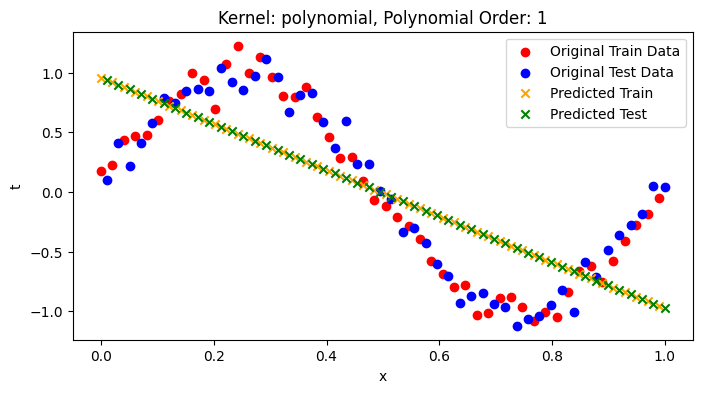

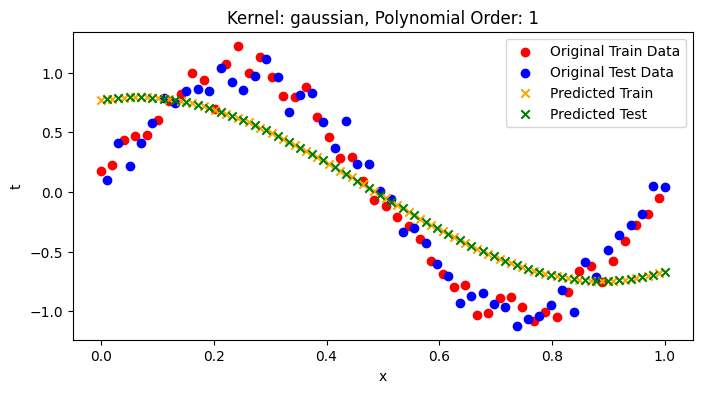

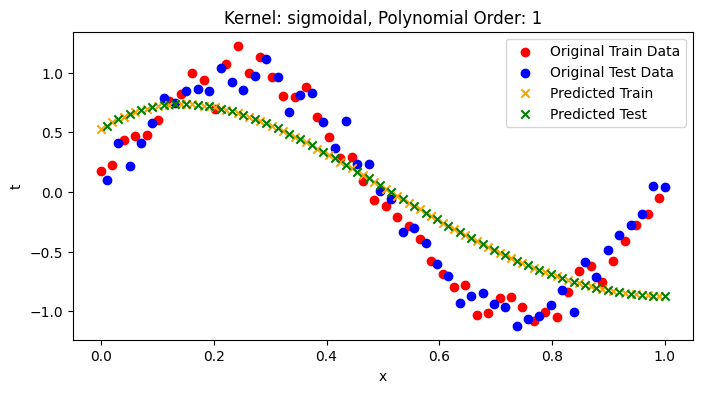

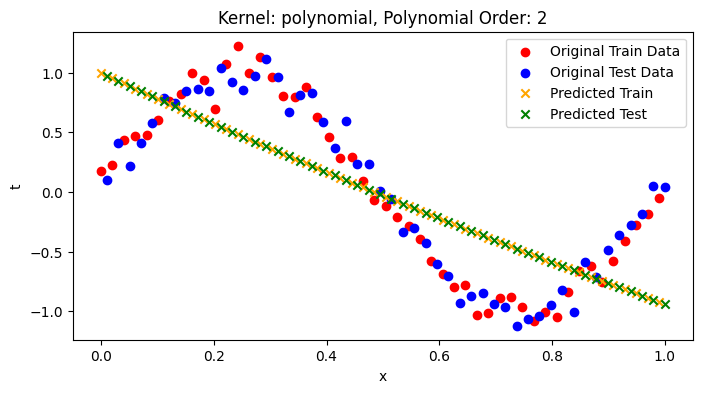

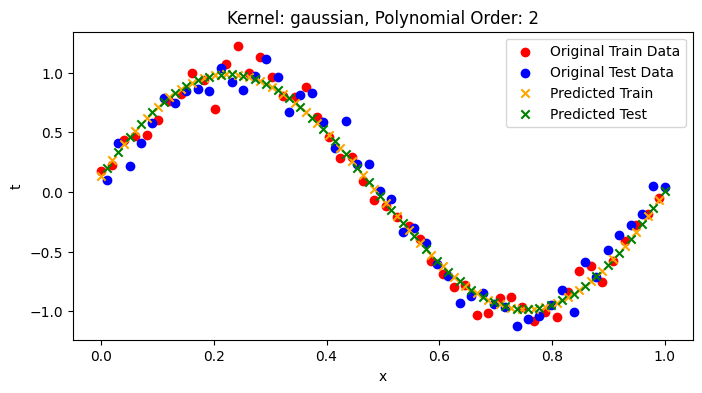

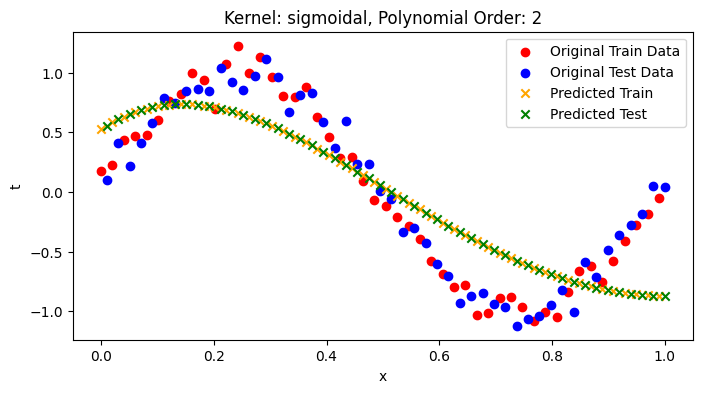

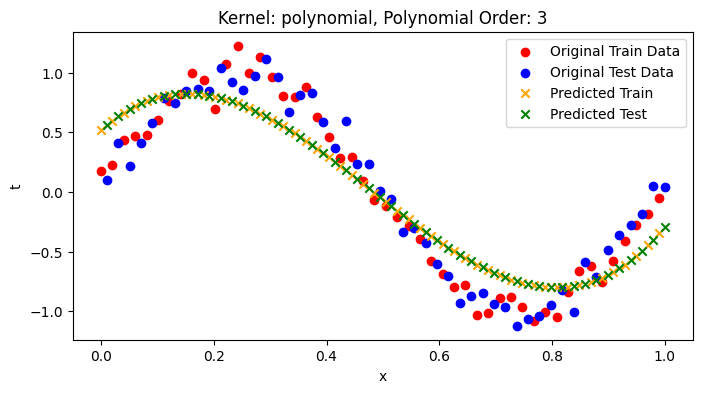

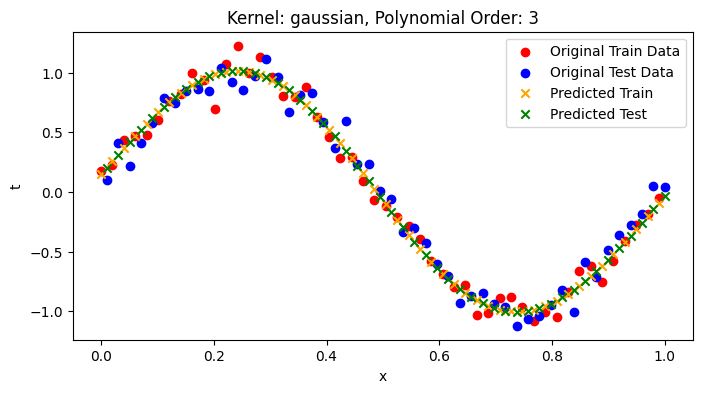

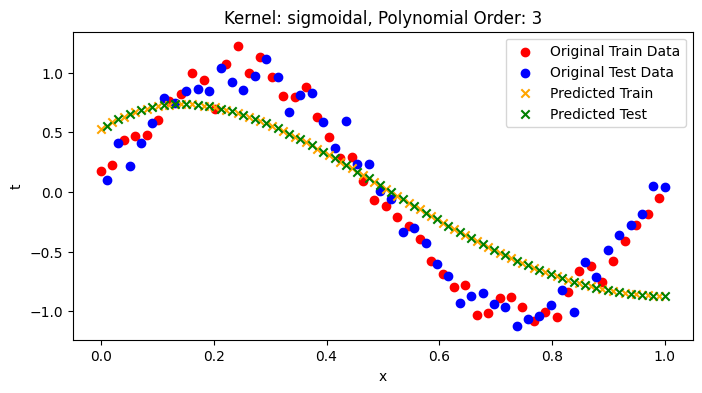

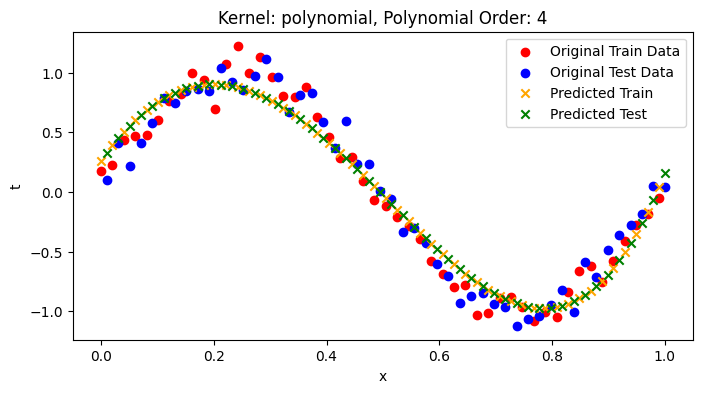

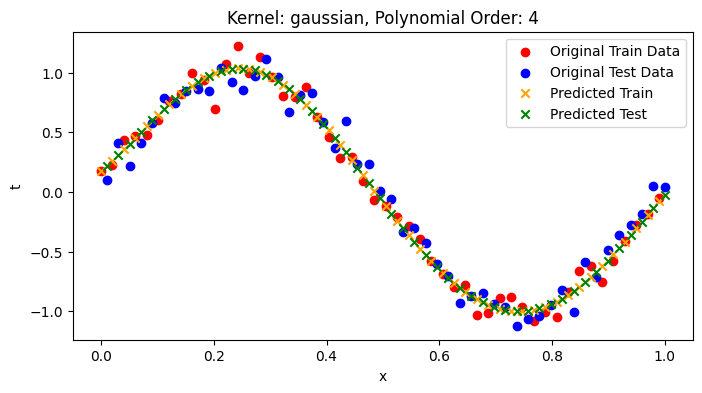

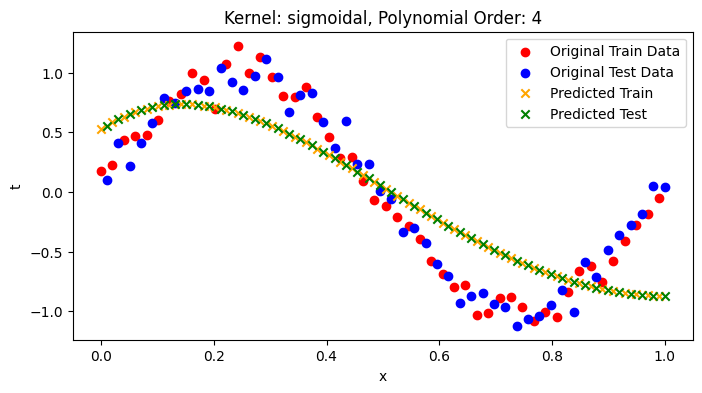

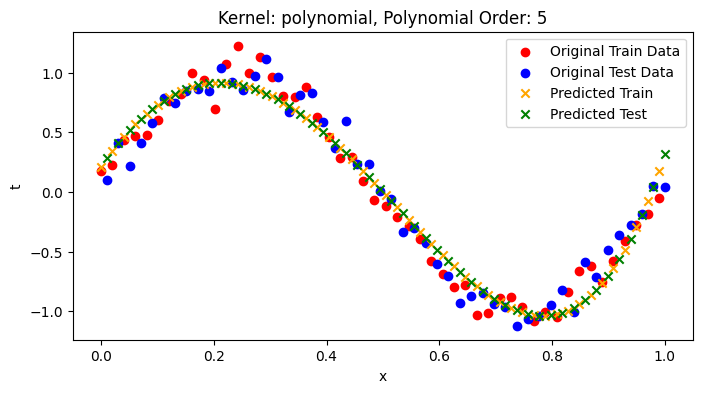

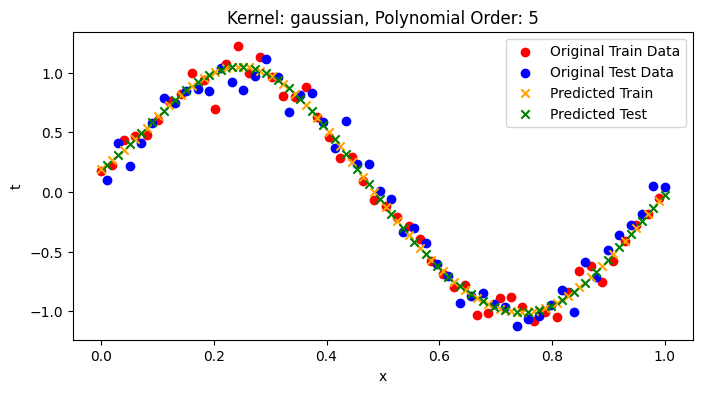

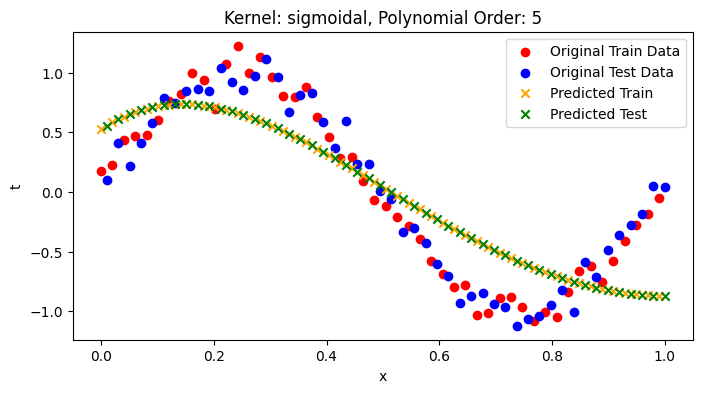

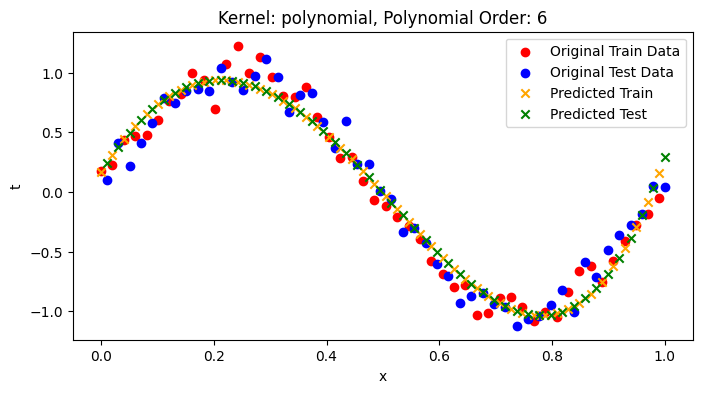

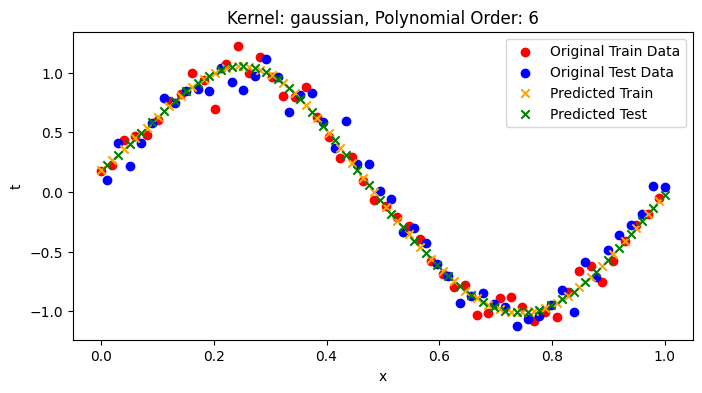

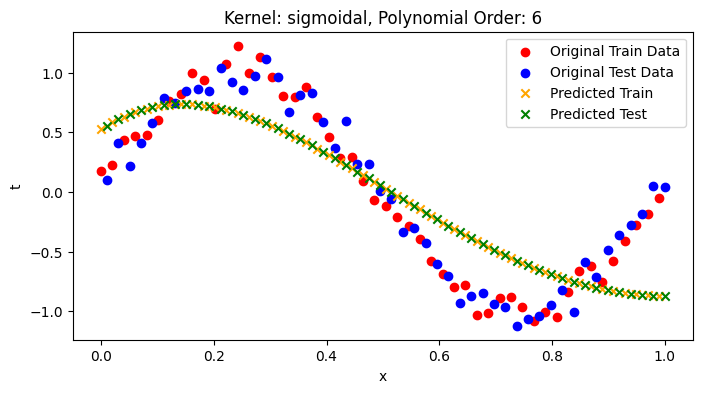

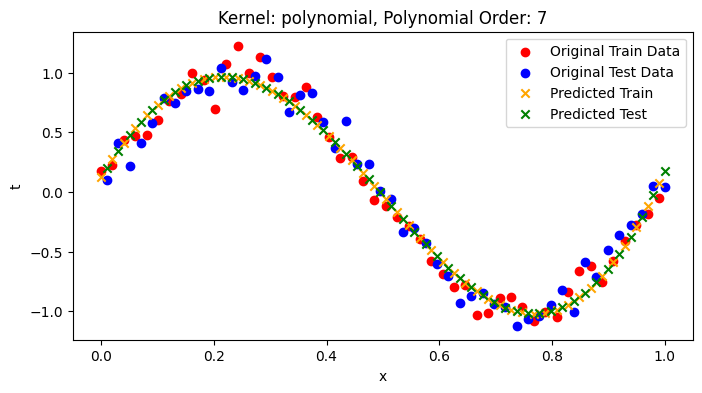

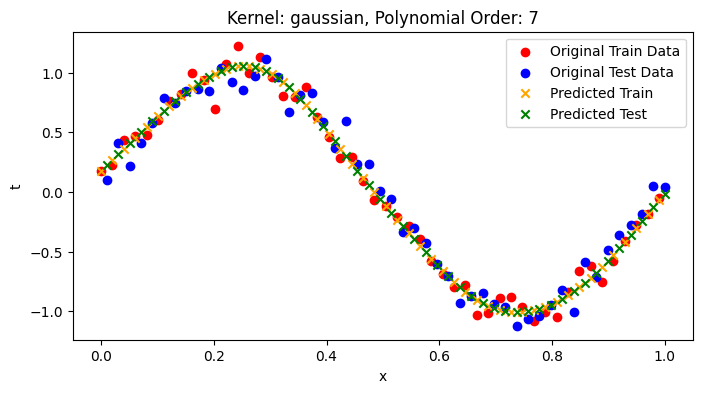

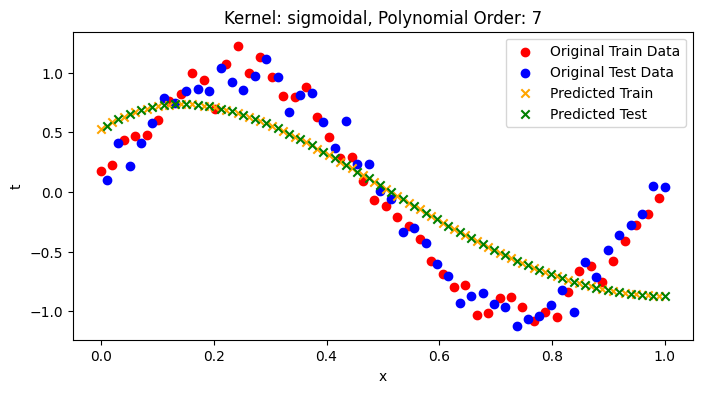

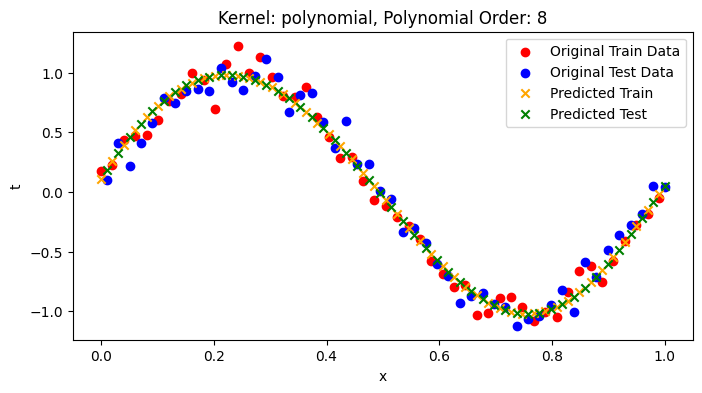

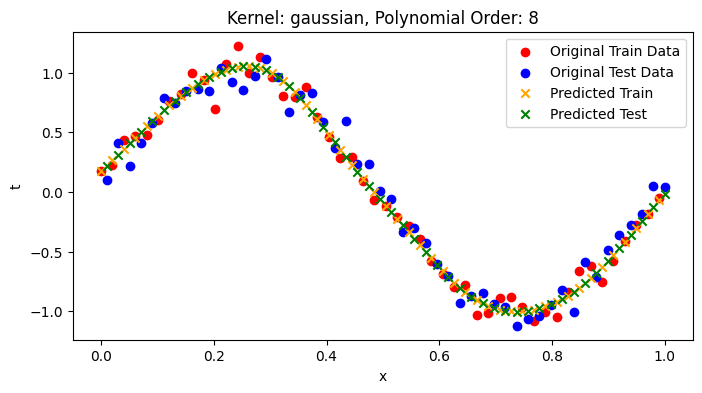

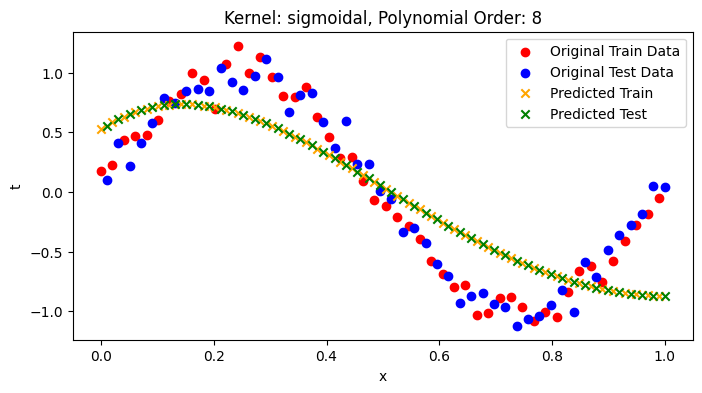

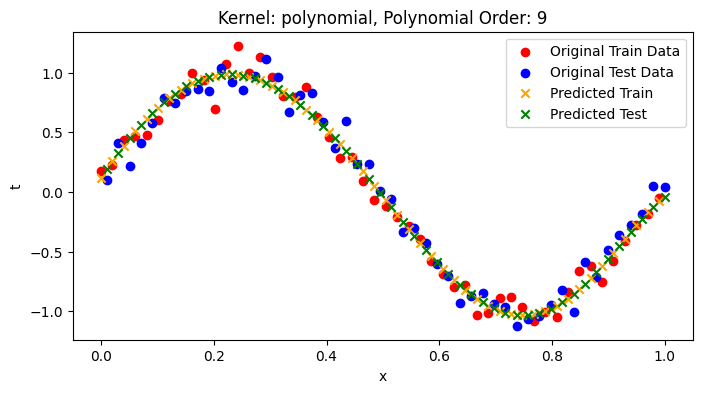

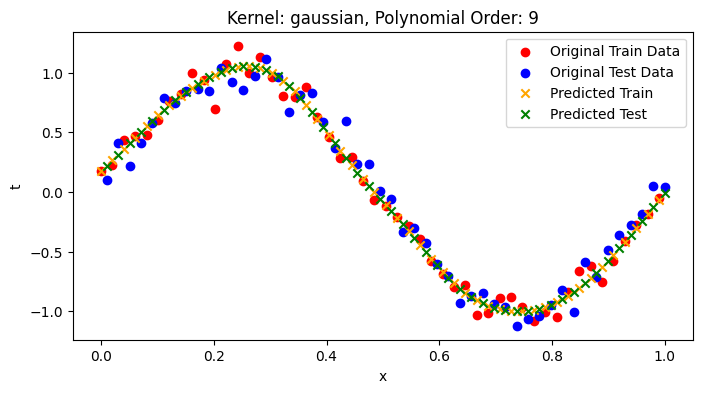

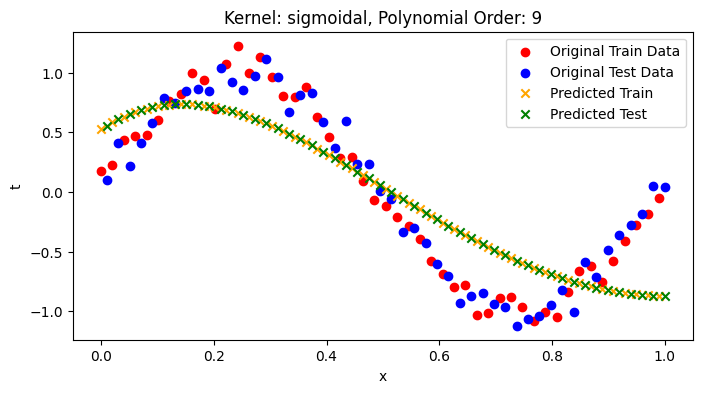

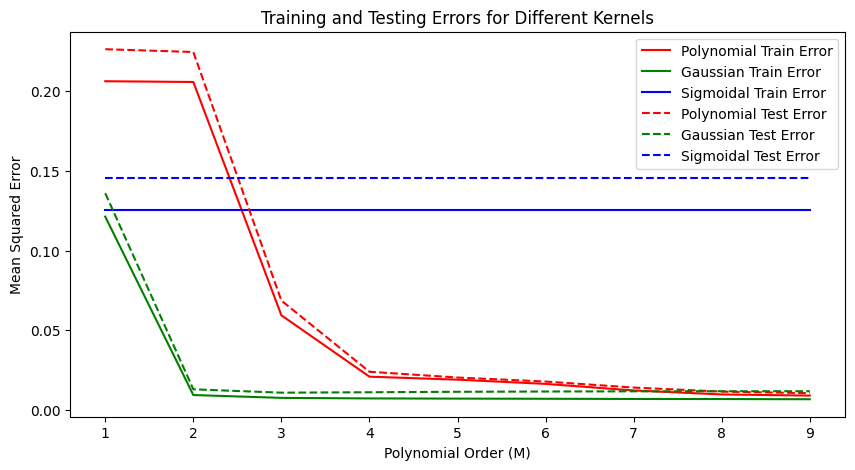

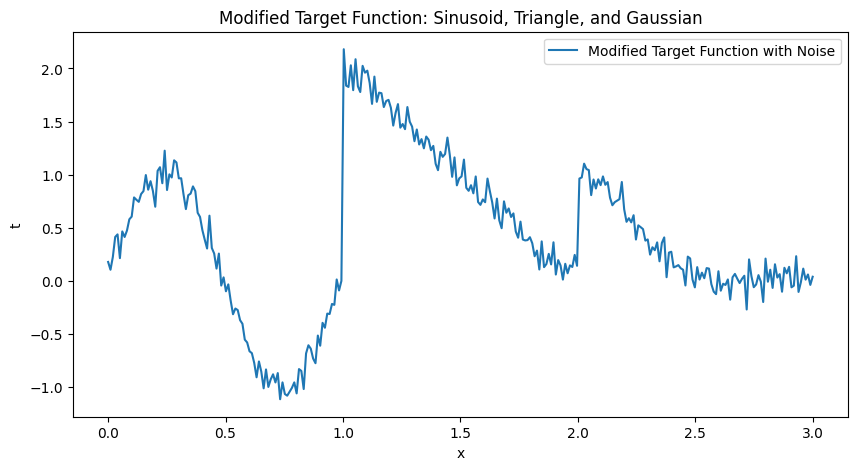

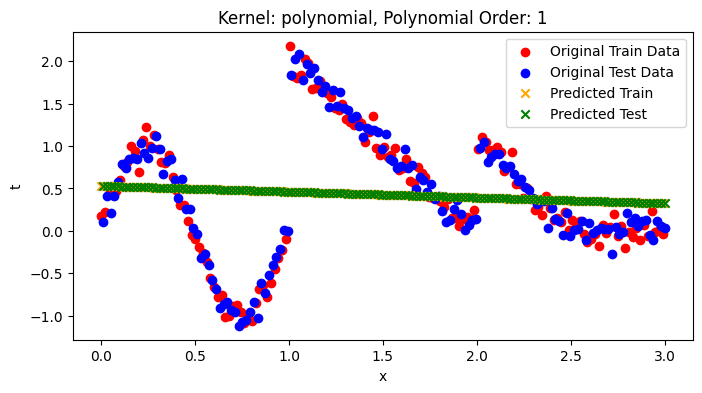

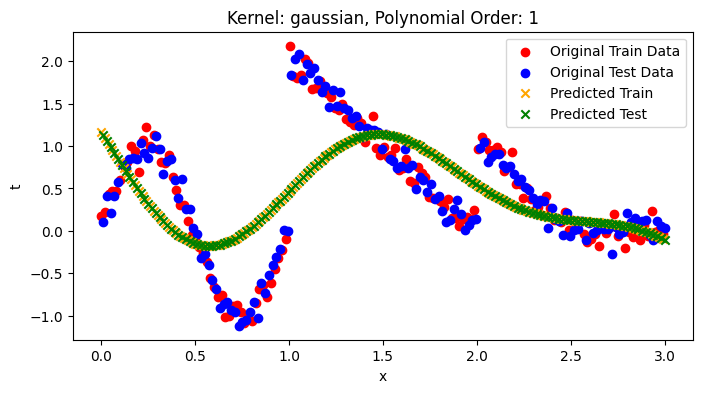

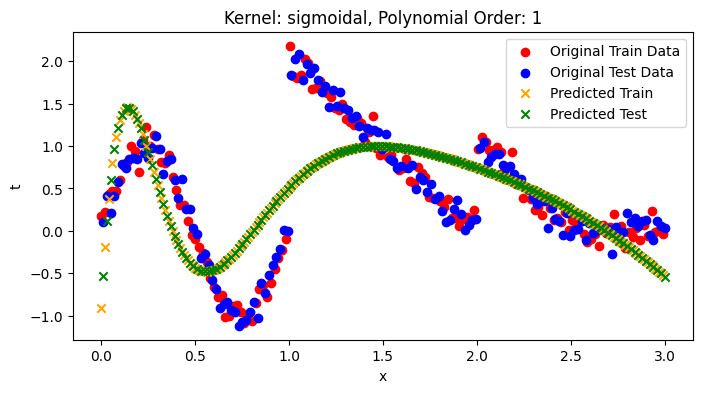

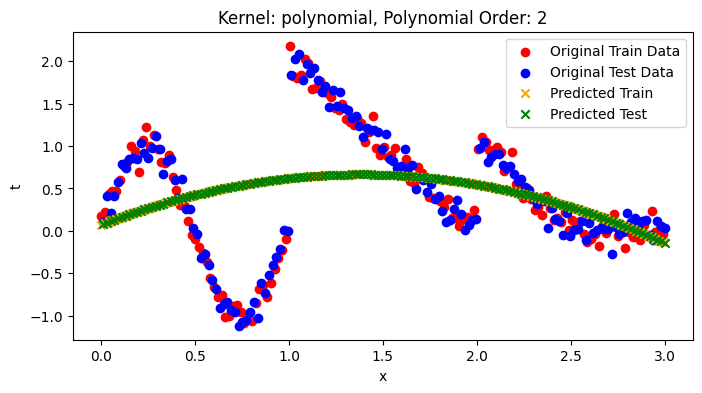

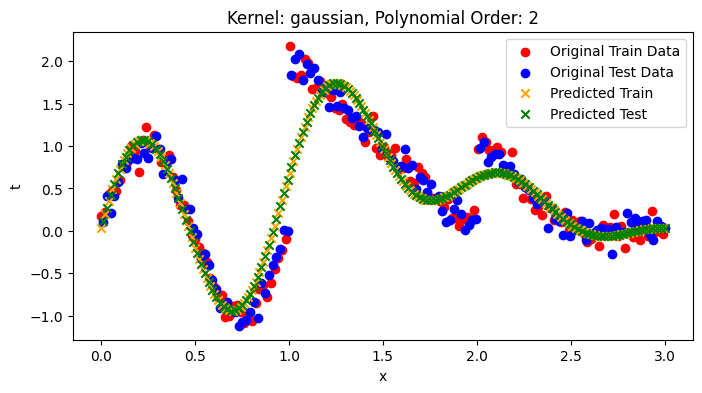

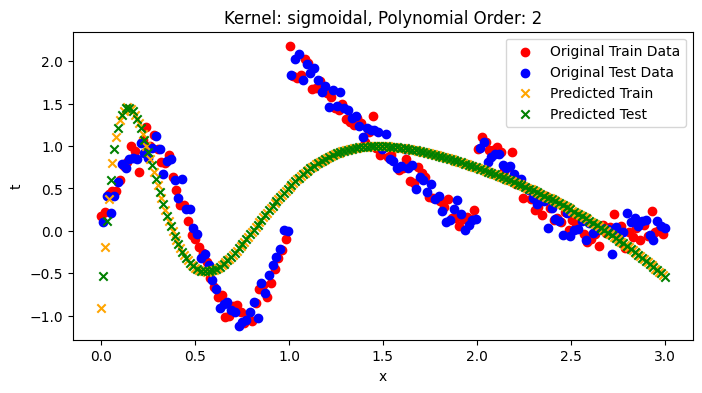

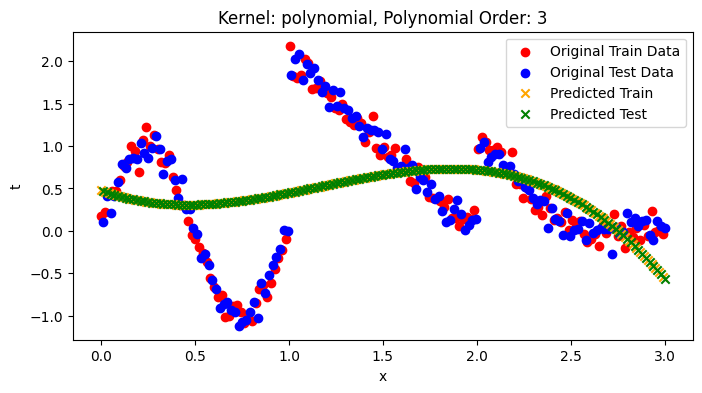

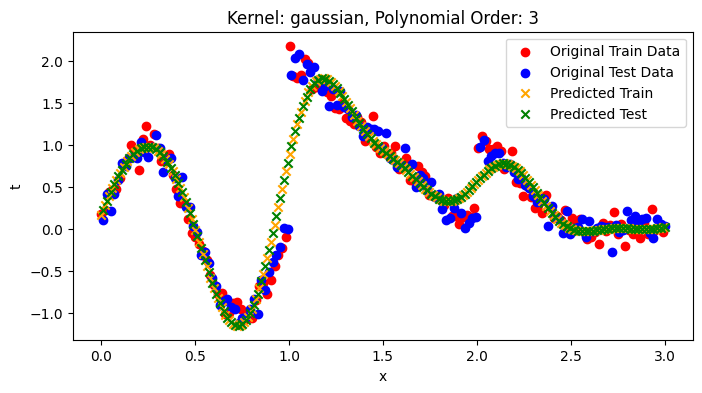

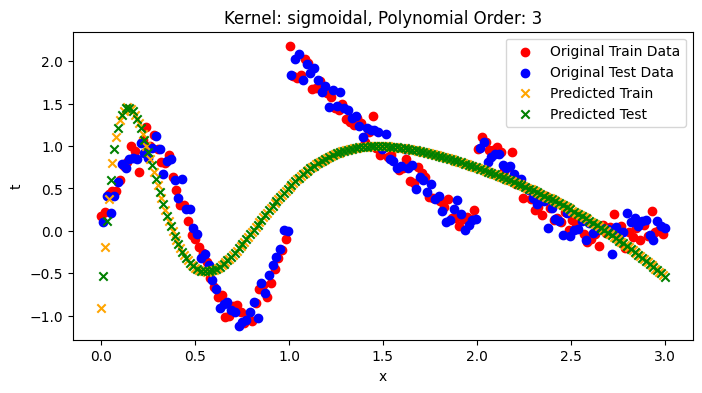

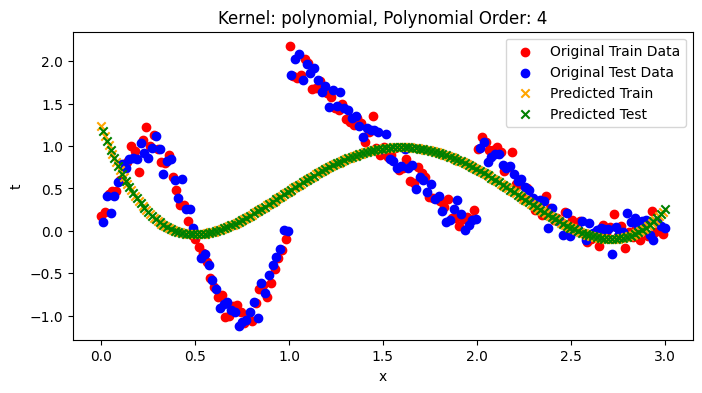

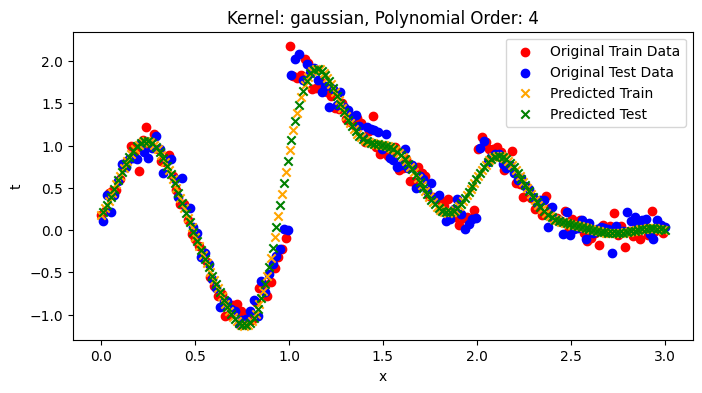

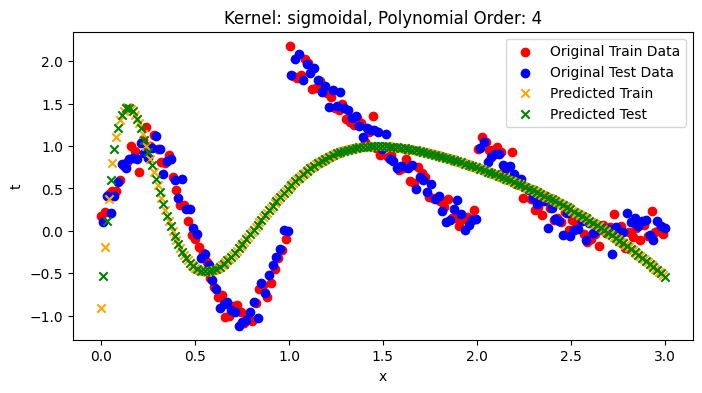

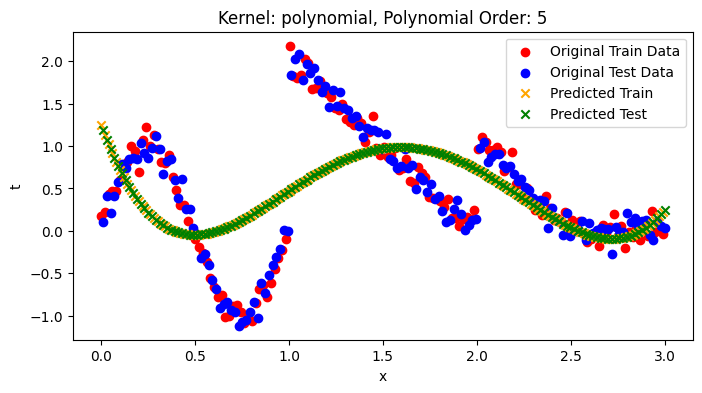

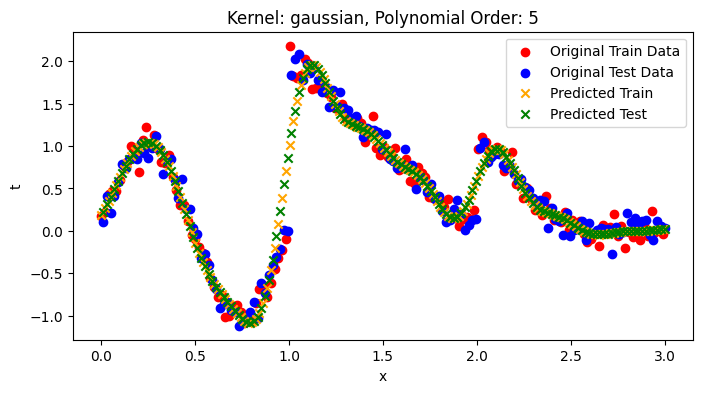

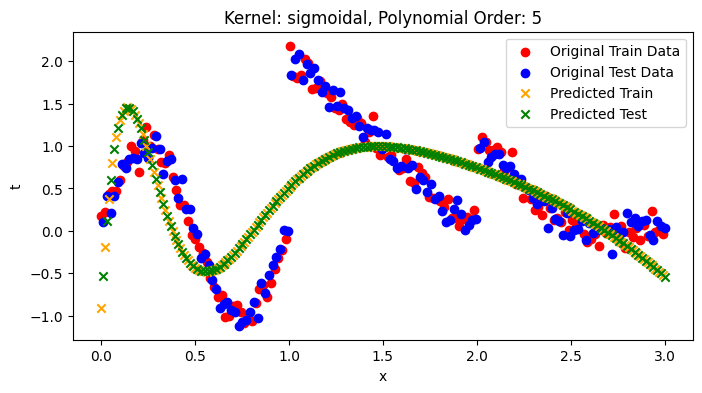

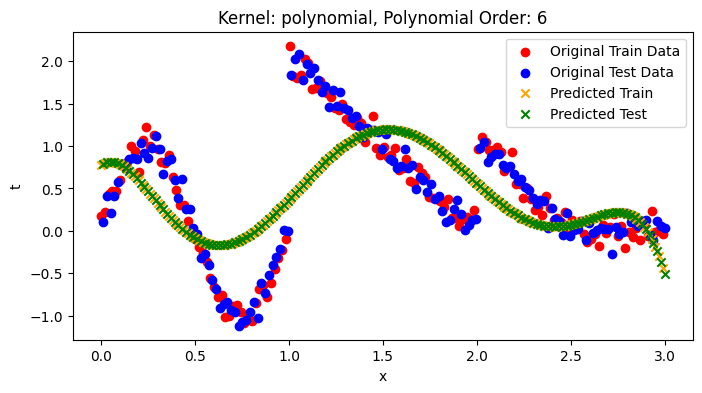

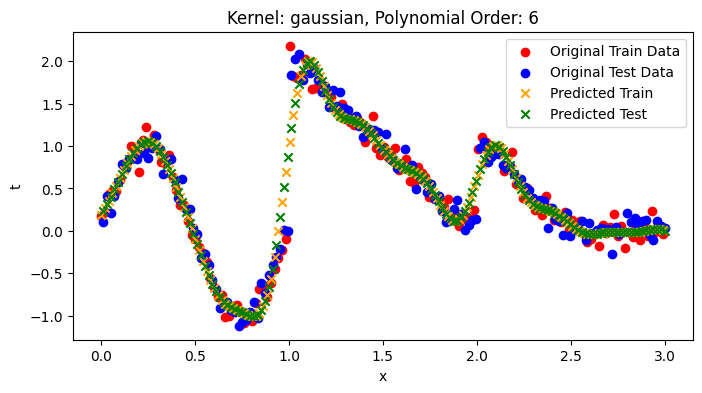

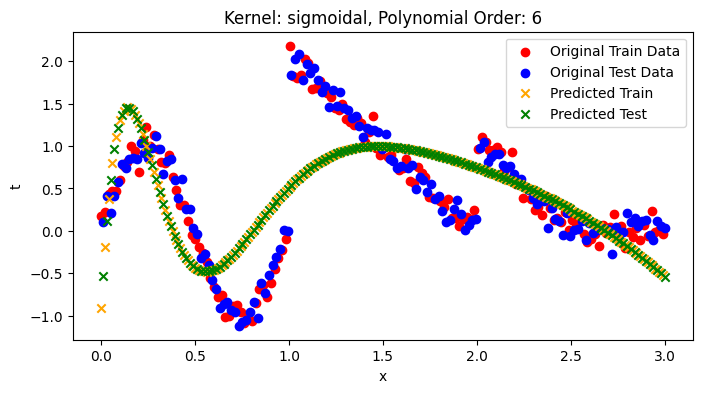

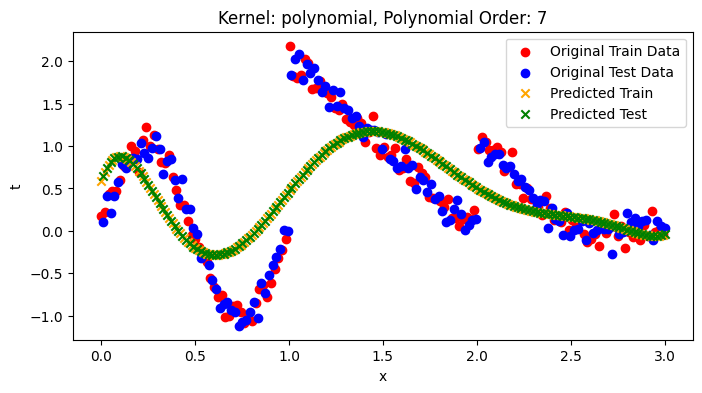

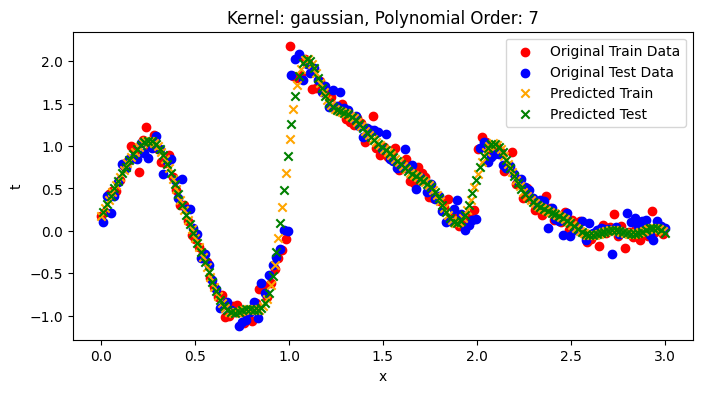

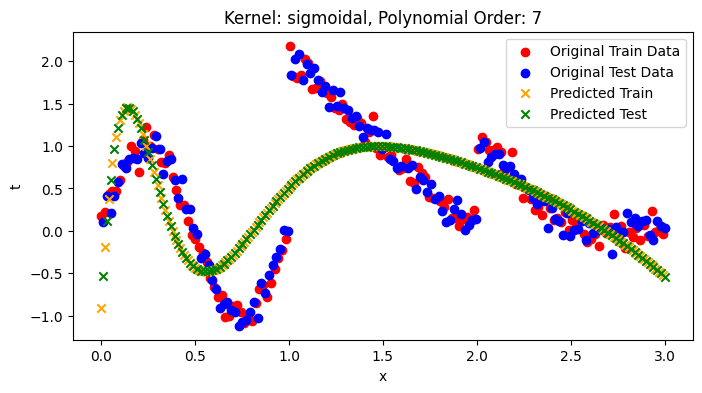

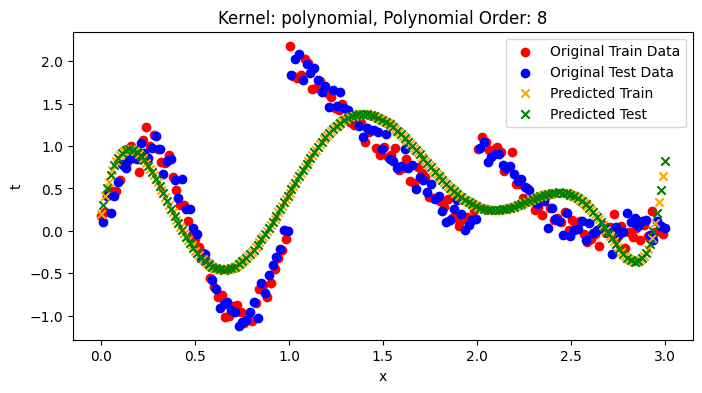

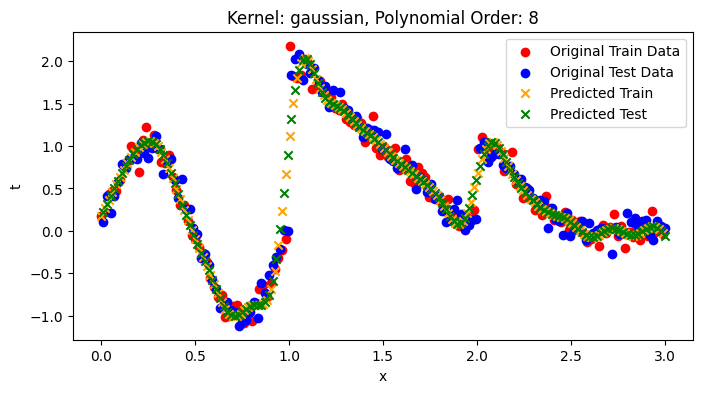

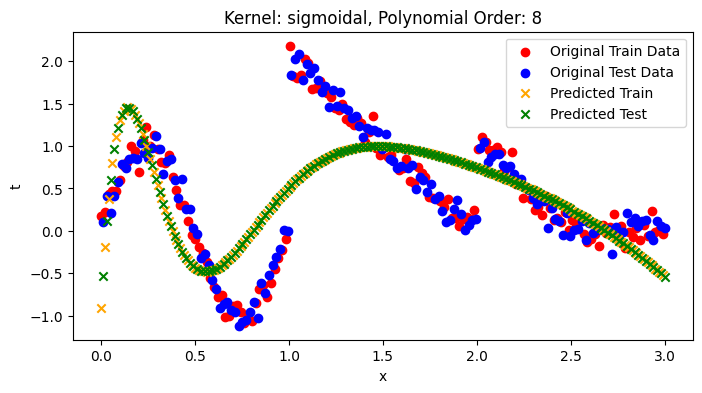

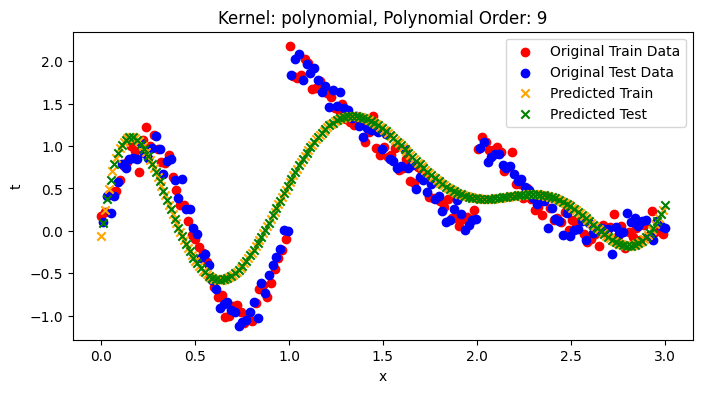

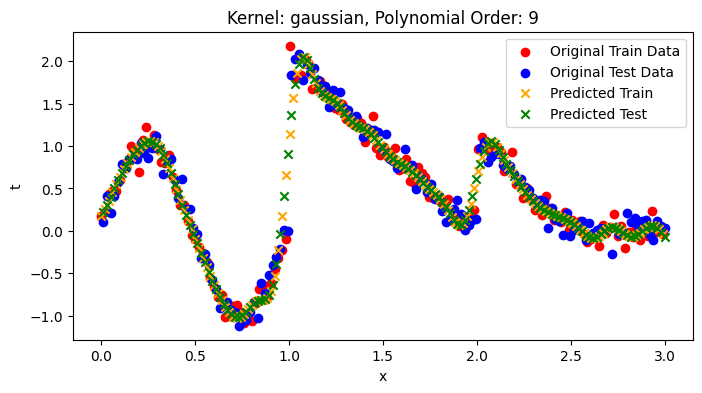

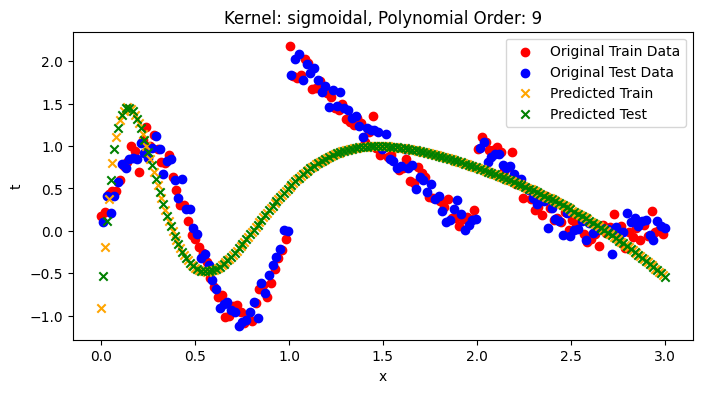

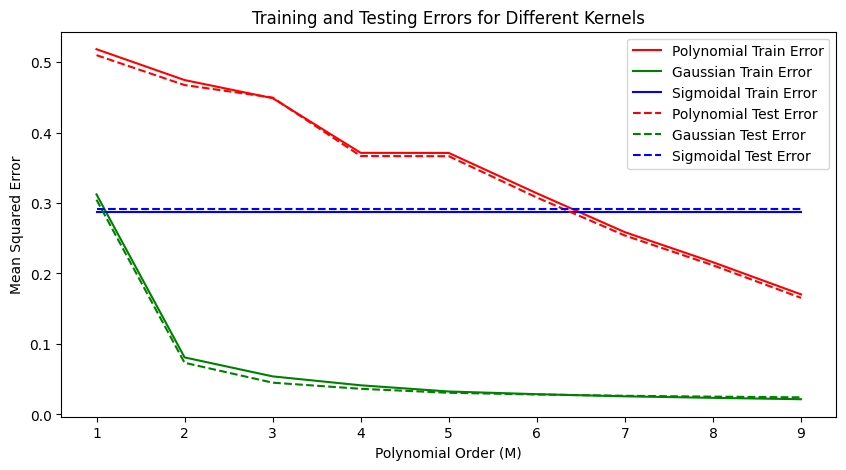

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#################################################part 3###################################

# Generate 100 data points
np.random.seed(0)
xn = np.linspace(0, 1, 100)
en = np.random.normal(0, 0.1, 100)
tn = np.sin(2 * np.pi * xn) + en

# Obtain train and test splits
train_indices = np.arange(0, 100, 2)  # Even indices for training
test_indices = np.arange(1, 100, 2)  # Odd indices for testing
X_train, Y_train = xn[train_indices], tn[train_indices]
X_test, Y_test = xn[test_indices], tn[test_indices]

# Function to estimate the parameters
def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda):
    if kernelType == 'polynomial':
        X = (1 + np.outer(X_train, X_train)) ** M
    elif kernelType == 'gaussian':
        pairwise_sq_dists = np.subtract.outer(X_train, X_train) ** 2
        X = np.exp(-pairwise_sq_dists / (2 * (1/M) ** 2))
    elif kernelType == 'sigmoidal':
        X = np.tanh(1 + np.outer(X_train, X_train))
    else:
        raise ValueError("Unknown kernel type")

    I = np.identity(len(X))
    w_opt = np.linalg.inv(X + lamda * I) @ Y_train
    return w_opt

# Function to compute the training and testing errors
def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType, M):
    if kernelType == 'polynomial':
        X_tr = (1 + np.outer(X_train, X_train)) ** M
        X_te = (1 + np.outer(X_test, X_train)) ** M
    elif kernelType == 'gaussian':
        pairwise_sq_dists_train = np.subtract.outer(X_train, X_train) ** 2
        X_tr = np.exp(-pairwise_sq_dists_train / (2 * (1/M) ** 2))
        pairwise_sq_dists_test = np.subtract.outer(X_test, X_train) ** 2
        X_te = np.exp(-pairwise_sq_dists_test / (2 * (1/M) ** 2))
    elif kernelType == 'sigmoidal':
        X_tr = np.tanh(1 + np.outer(X_train, X_train))
        X_te = np.tanh(1 + np.outer(X_test, X_train))
    else:
        raise ValueError("Unknown kernel type")

    Y_train_pred = X_tr @ w_est
    Y_test_pred = X_te @ w_est

    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)

    return TrainError, TestError, Y_train_pred, Y_test_pred

# Iterate through range of M values
M_range = range(1, 10)
lamda = 0.01  # Regularization parameter

polynomial_tr_error, polynomial_te_error = [], []
gaussian_tr_error, gaussian_te_error = [], []
sigmoid_tr_error, sigmoid_te_error = [], []

for M in M_range:
    for kernelType in ['polynomial', 'gaussian', 'sigmoidal']:
        w_est = KernelRegressionFit(X_train, Y_train, kernelType, M, lamda)
        TrainError, TestError, Y_train_pred, Y_test_pred = KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType, M)

        if kernelType == 'polynomial':
            polynomial_tr_error.append(TrainError)
            polynomial_te_error.append(TestError)
        elif kernelType == 'gaussian':
            gaussian_tr_error.append(TrainError)
            gaussian_te_error.append(TestError)
        elif kernelType == 'sigmoidal':
            sigmoid_tr_error.append(TrainError)
            sigmoid_te_error.append(TestError)

        plt.figure(figsize=(8, 4))
        plt.scatter(X_train, Y_train, color='red', label='Original Train Data')
        plt.scatter(X_test, Y_test, color='blue', label='Original Test Data')
        plt.scatter(X_train, Y_train_pred, color='orange', marker='x', label='Predicted Train')
        plt.scatter(X_test, Y_test_pred, color='green', marker='x', label='Predicted Test')
        plt.xlabel('x')
        plt.ylabel('t')
        plt.title(f'Kernel: {kernelType}, Polynomial Order: {M}')
        plt.legend()
        plt.show()

# Plot training and testing errors
plt.figure(figsize=(10, 5))
plt.plot(M_range, polynomial_tr_error, 'r-', label='Polynomial Train Error')
plt.plot(M_range, gaussian_tr_error, 'g-', label='Gaussian Train Error')
plt.plot(M_range, sigmoid_tr_error, 'b-', label='Sigmoidal Train Error')
plt.plot(M_range, polynomial_te_error, 'r--', label='Polynomial Test Error')
plt.plot(M_range, gaussian_te_error, 'g--', label='Gaussian Test Error')
plt.plot(M_range, sigmoid_te_error, 'b--', label='Sigmoidal Test Error')
plt.xlabel('Polynomial Order (M)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Kernels')
plt.legend()
plt.show()


#Repeat the experiments by changing target function

np.random.seed(0)
xn = np.linspace(0, 3, 300)
en = np.random.normal(0, 0.1, 300)

# Define the target function with three components
def target_function(x):
    if x < 1:
        return np.sin(2 * np.pi * x)
    elif x < 2:
        return 2 * (1 - abs(x - 1))  # Triangle wave
    else:
        return np.exp(-((x - 2) ** 2) / 0.1)  # Gaussian

tn = np.array([target_function(x) for x in xn]) + en

# Obtain train and test splits
train_indices = np.arange(0, 300, 2)  # Even indices for training
test_indices = np.arange(1, 300, 2)  # Odd indices for testing
X_train, Y_train = xn[train_indices], tn[train_indices]
X_test, Y_test = xn[test_indices], tn[test_indices]

# Plot the modified target function
plt.figure(figsize=(10, 5))
plt.plot(xn, tn, label='Modified Target Function with Noise')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Modified Target Function: Sinusoid, Triangle, and Gaussian')
plt.legend()
plt.show()

# Kernel regression functions
def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda):
    if kernelType == 'polynomial':
        X = (1 + np.outer(X_train, X_train)) ** M
    elif kernelType == 'gaussian':
        pairwise_sq_dists = np.subtract.outer(X_train, X_train) ** 2
        X = np.exp(-pairwise_sq_dists / (2 * (1/M) ** 2))
    elif kernelType == 'sigmoidal':
        X = np.tanh(1 + np.outer(X_train, X_train))
    else:
        raise ValueError("Unknown kernel type")

    I = np.identity(len(X))
    w_opt = np.linalg.inv(X + lamda * I) @ Y_train
    return w_opt

def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType, M):
    if kernelType == 'polynomial':
        X_tr = (1 + np.outer(X_train, X_train)) ** M
        X_te = (1 + np.outer(X_test, X_train)) ** M
    elif kernelType == 'gaussian':
        pairwise_sq_dists_train = np.subtract.outer(X_train, X_train) ** 2
        X_tr = np.exp(-pairwise_sq_dists_train / (2 * (1/M) ** 2))
        pairwise_sq_dists_test = np.subtract.outer(X_test, X_train) ** 2
        X_te = np.exp(-pairwise_sq_dists_test / (2 * (1/M) ** 2))
    elif kernelType == 'sigmoidal':
        X_tr = np.tanh(1 + np.outer(X_train, X_train))
        X_te = np.tanh(1 + np.outer(X_test, X_train))
    else:
        raise ValueError("Unknown kernel type")

    Y_train_pred = X_tr @ w_est
    Y_test_pred = X_te @ w_est

    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)

    return TrainError, TestError, Y_train_pred, Y_test_pred

# Iterate through range of M values
M_range = range(1, 10)
lamda = 0.01

polynomial_tr_error, polynomial_te_error = [], []
gaussian_tr_error, gaussian_te_error = [], []
sigmoid_tr_error, sigmoid_te_error = [], []

for M in M_range:
    for kernelType in ['polynomial', 'gaussian', 'sigmoidal']:
        w_est = KernelRegressionFit(X_train, Y_train, kernelType, M, lamda)
        TrainError, TestError, Y_train_pred, Y_test_pred = KernelRegressionPred_Error(w_est,X_train, Y_train, X_test, Y_test, kernelType, M)

        if kernelType == 'polynomial':
            polynomial_tr_error.append(TrainError)
            polynomial_te_error.append(TestError)
        elif kernelType == 'gaussian':
            gaussian_tr_error.append(TrainError)
            gaussian_te_error.append(TestError)
        elif kernelType == 'sigmoidal':
            sigmoid_tr_error.append(TrainError)
            sigmoid_te_error.append(TestError)

        plt.figure(figsize=(8, 4))
        plt.scatter(X_train,Y_train,color='red',label='Original Train Data')
        plt.scatter(X_test,Y_test,color='blue',label='Original Test Data')
        plt.scatter(X_train, Y_train_pred,color='orange',marker='x',label='Predicted Train')
        plt.scatter(X_test,Y_test_pred,color='green',marker='x',label='Predicted Test')
        plt.xlabel('x')
        plt.ylabel('t')
        plt.title(f'Kernel: {kernelType}, Polynomial Order: {M}')
        plt.legend()
        plt.show()

# Plot training and testing errors for all kernels
plt.figure(figsize=(10, 5))
plt.plot(M_range,polynomial_tr_error,'r-',label='Polynomial Train Error')
plt.plot(M_range,gaussian_tr_error,'g-',label='Gaussian Train Error')
plt.plot(M_range,sigmoid_tr_error,'b-',label='Sigmoidal Train Error')
plt.plot(M_range,polynomial_te_error,'r--',label='Polynomial Test Error')
plt.plot(M_range,gaussian_te_error,'g--',label='Gaussian Test Error')
plt.plot(M_range,sigmoid_te_error,'b--',label='Sigmoidal Test Error')
plt.xlabel('Polynomial Order (M)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Kernels')
plt.legend()
plt.show()


Kernel: polynomial, Polynomial Order: 3


<ipython-input-42-b6a6ae930ded>:51: RuntimeWarning: overflow encountered in square
  TrainError = np.mean((Y_train - Y_train_pred) ** 2)
<ipython-input-42-b6a6ae930ded>:52: RuntimeWarning: overflow encountered in square
  TestError = np.mean((Y_test - Y_test_pred) ** 2)
<ipython-input-42-b6a6ae930ded>:48: RuntimeWarning: overflow encountered in matmul
  Y_train_pred = K_train @ w_est
<ipython-input-42-b6a6ae930ded>:49: RuntimeWarning: overflow encountered in matmul
  Y_test_pred = K_test @ w_est
<ipython-input-42-b6a6ae930ded>:92: RuntimeWarning: overflow encountered in multiply
  grad_w_i = -2 * (batch_Y[n] - K_i @ weights) * K_i
<ipython-input-42-b6a6ae930ded>:93: RuntimeWarning: overflow encountered in add
  grad_w_batch += grad_w_i
<ipython-input-42-b6a6ae930ded>:95: RuntimeWarning: invalid value encountered in subtract
  weights -= stepSize * grad_w_batch / len(batch_X)  # Update weights


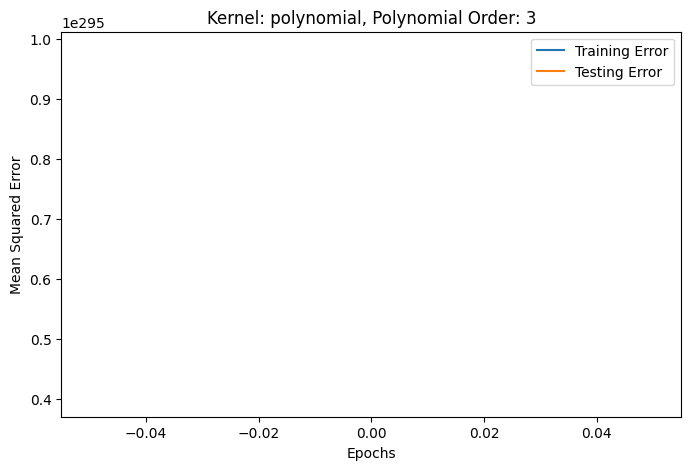

Kernel: gaussian, Polynomial Order: 3


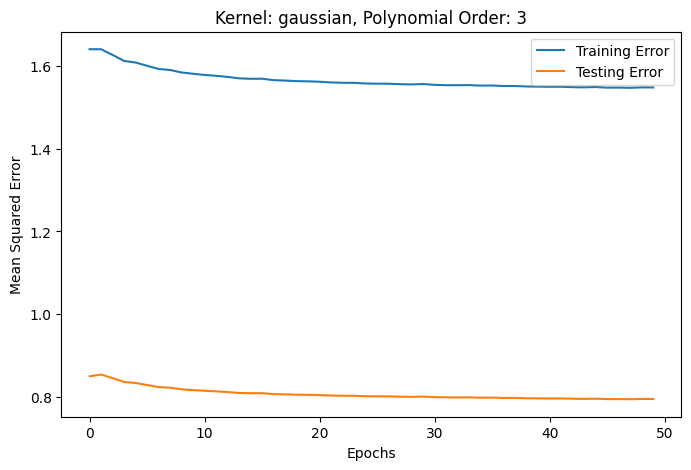

Kernel: sigmoidal, Polynomial Order: 3


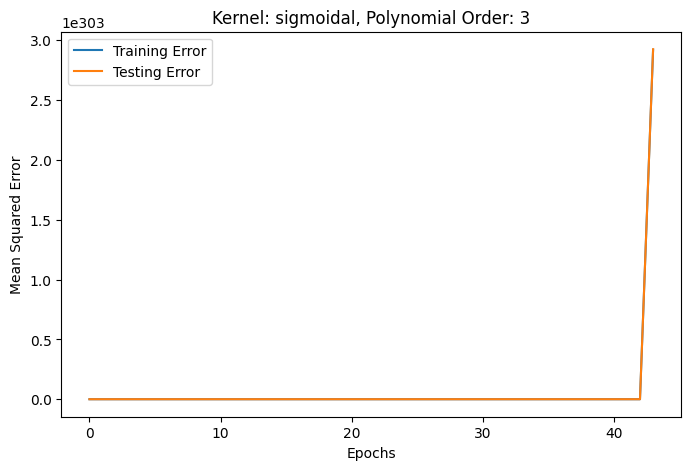

Kernel: polynomial, Polynomial Order: 5


<ipython-input-42-b6a6ae930ded>:92: RuntimeWarning: overflow encountered in matmul
  grad_w_i = -2 * (batch_Y[n] - K_i @ weights) * K_i
<ipython-input-42-b6a6ae930ded>:92: RuntimeWarning: overflow encountered in scalar multiply
  grad_w_i = -2 * (batch_Y[n] - K_i @ weights) * K_i


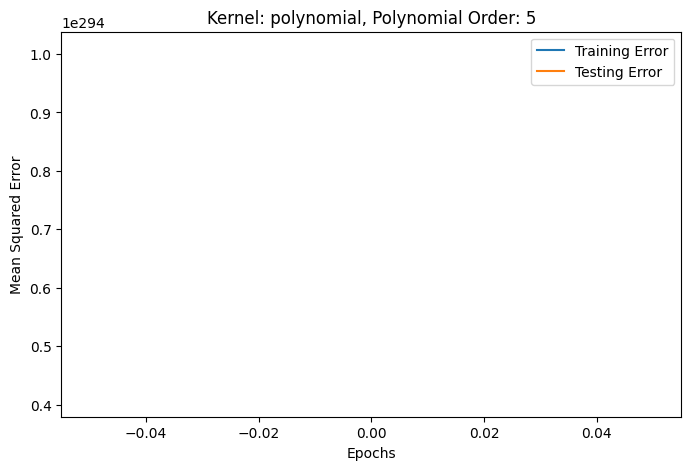

Kernel: gaussian, Polynomial Order: 5


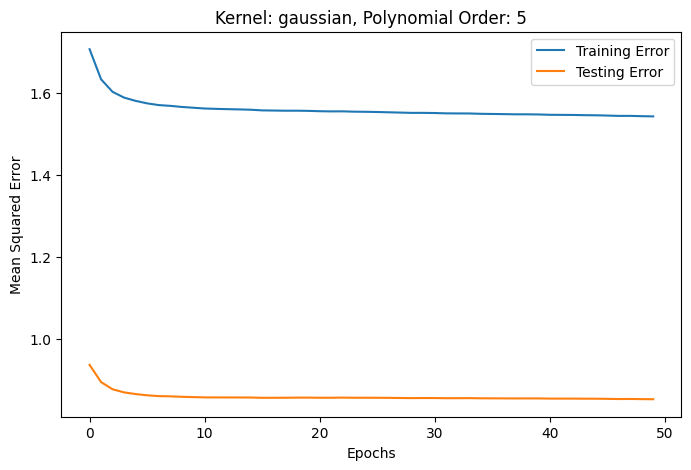

Kernel: sigmoidal, Polynomial Order: 5


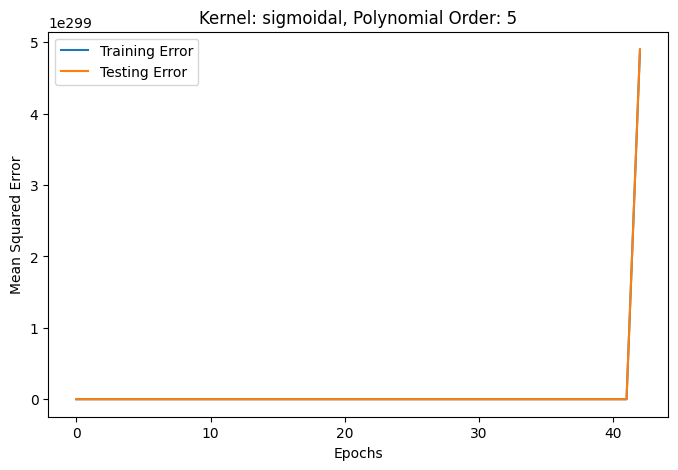

Step size: 0.001


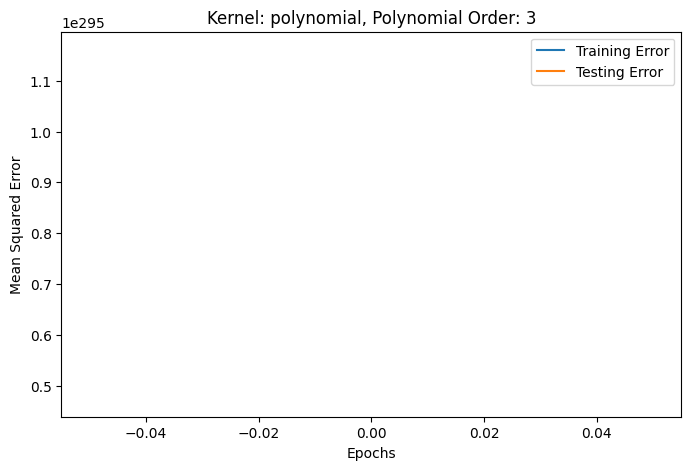

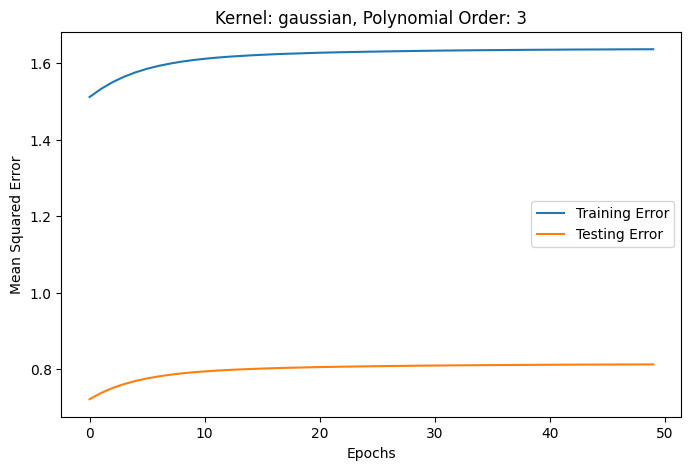

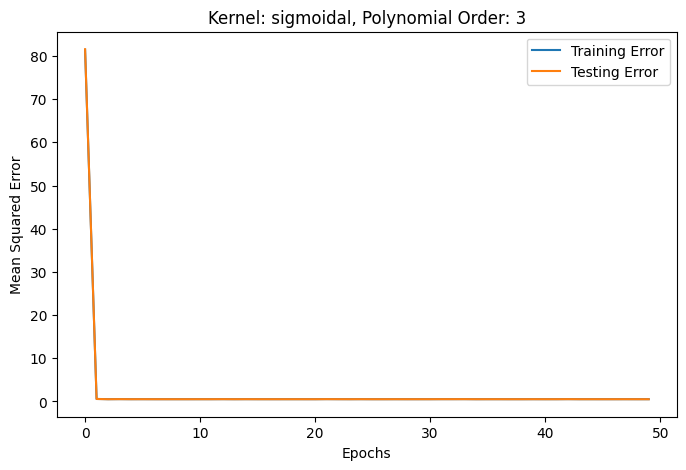

Step size: 0.01


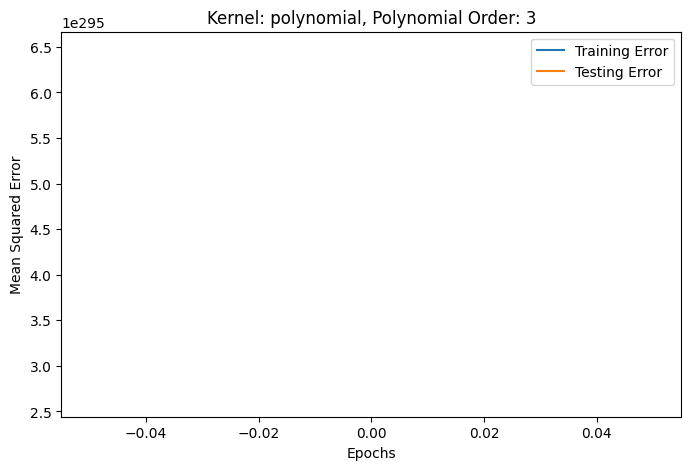

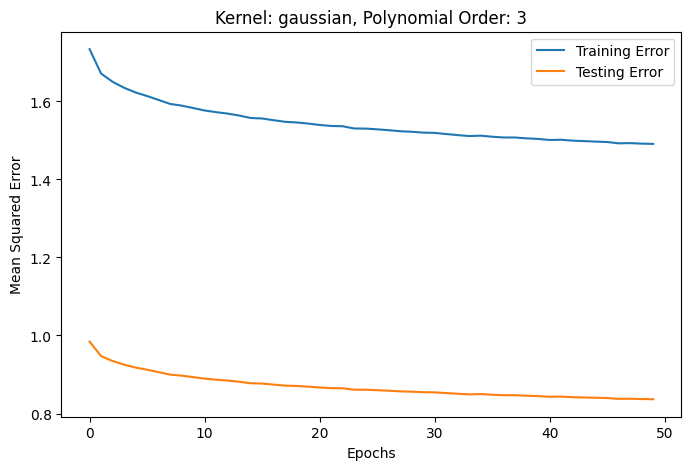

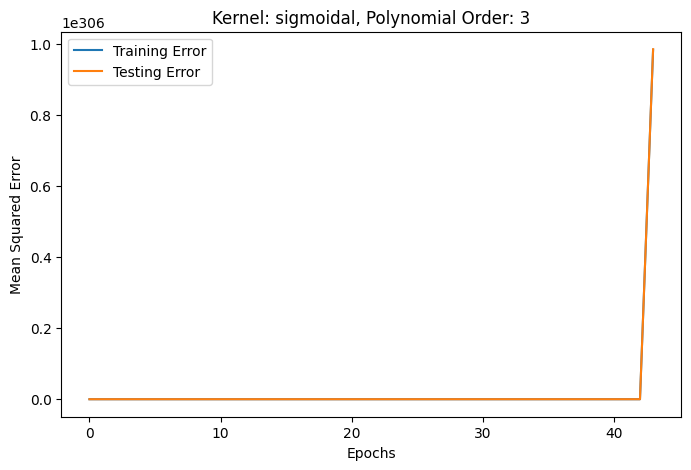

Step size: 0.05


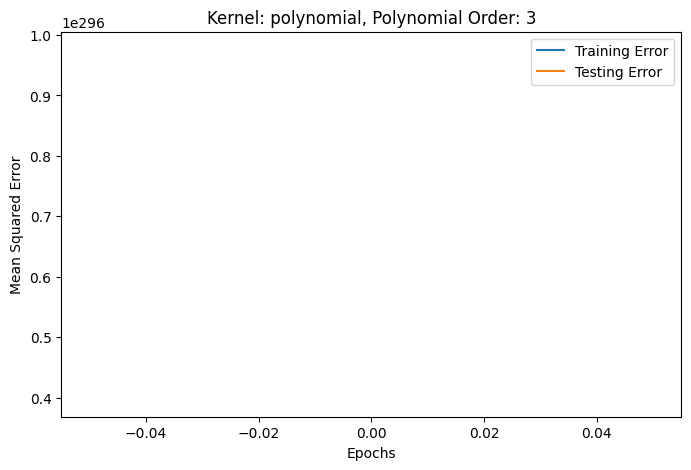

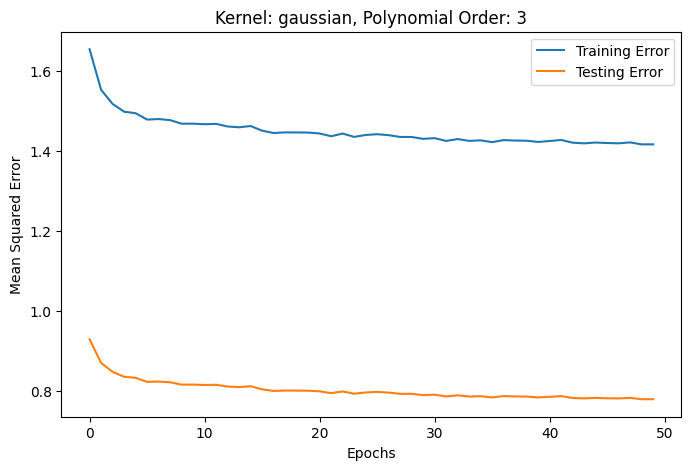

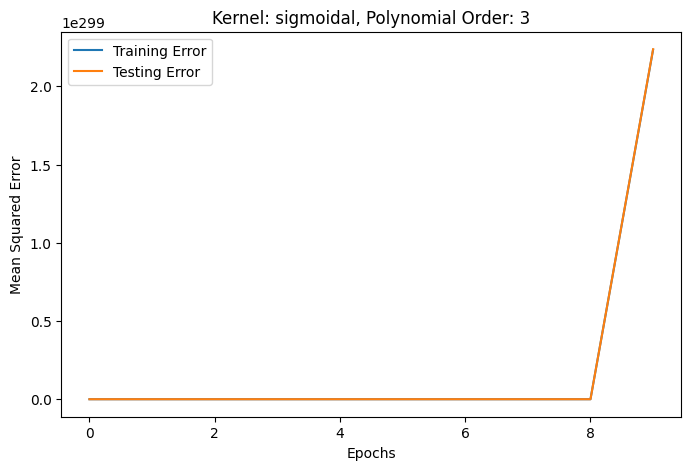

Batch size: 5


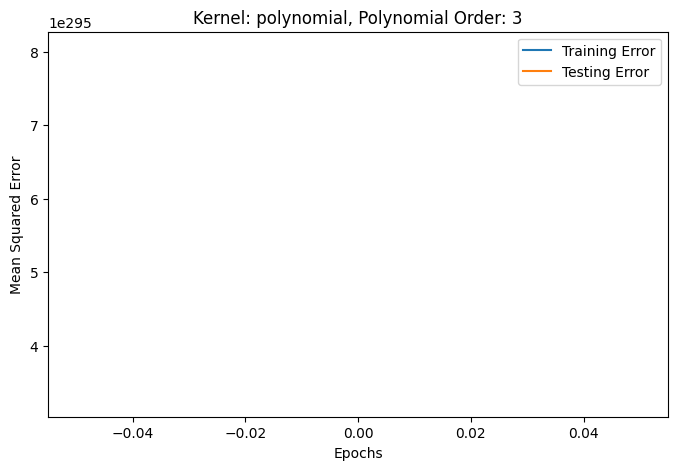

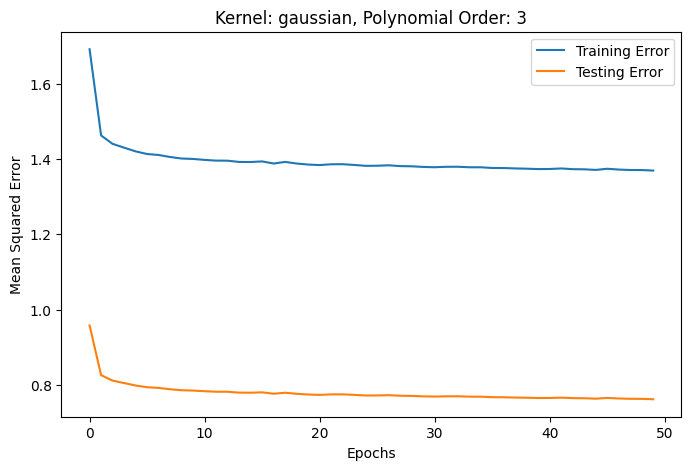

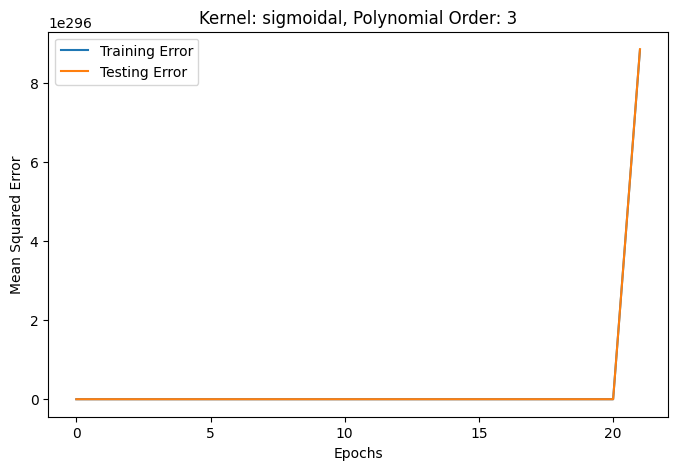

Batch size: 10


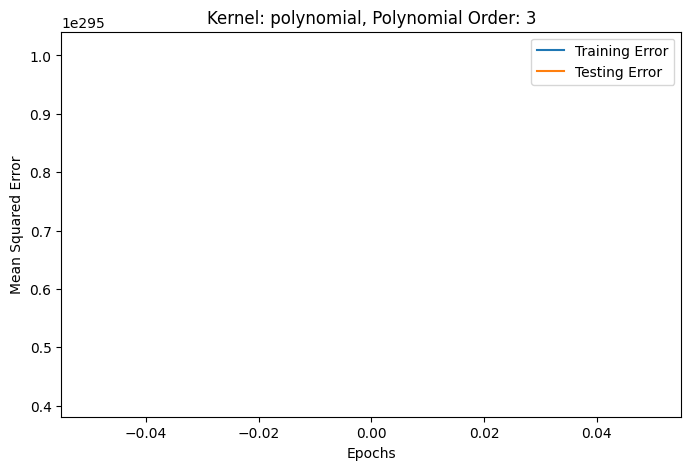

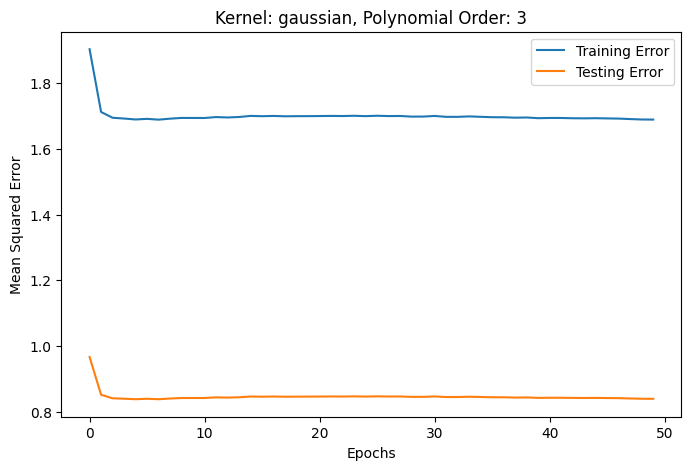

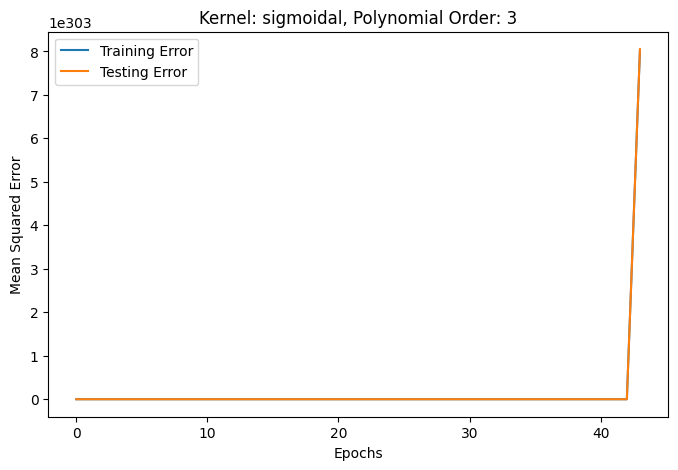

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

########################################part 4##############

# Generate data
np.random.seed(0)
xn = np.linspace(0, 3, 300)
en = np.random.normal(0, 0.1, 300)

def target_function(x):
    if x < 1:
        return np.sin(2 * np.pi * x)
    elif x < 2:
        return 2 * (1 - abs(x - 1))  # Triangle wave
    else:
        return np.exp(-((x - 2) ** 2) / 0.1)  # Gaussian

tn = np.array([target_function(x) for x in xn]) + en

train_indices = np.arange(0, 300, 2)
test_indices = np.arange(1, 300, 2)
X_train, Y_train = xn[train_indices], tn[train_indices]
X_test, Y_test = xn[test_indices], tn[test_indices]

# Kernel functions
def polynomial_kernel(X1, X2, M):
    return (1 + np.outer(X1, X2)) ** M

def gaussian_kernel(X1, X2, gamma):
    pairwise_sq_dists = np.subtract.outer(X1, X2) ** 2
    return np.exp(-pairwise_sq_dists / (2 * gamma ** 2))

def sigmoidal_kernel(X1, X2):
    return np.tanh(1 + np.outer(X1, X2))

# Error prediction function
def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    M = len(w_est) - 1
    if kernelType == 'polynomial':
        K_train = polynomial_kernel(X_train, X_train, M)
        K_test = polynomial_kernel(X_test, X_train, M)
    elif kernelType == 'gaussian':
        K_train = gaussian_kernel(X_train, X_train, gamma=1/M)
        K_test = gaussian_kernel(X_test, X_train, gamma=1/M)
    elif kernelType == 'sigmoidal':
        K_train = sigmoidal_kernel(X_train, X_train)
        K_test = sigmoidal_kernel(X_test, X_train)

    Y_train_pred = K_train @ w_est
    Y_test_pred = K_test @ w_est

    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)

    return TrainError, TestError

# Online training function
def OnlineTraining(X_train, Y_train, X_test, Y_test,
                   kernelType, M, Epochs,
                   BatchSize, stepSize):
    N = len(X_train)
    weights = np.random.randn(N)  # Initialize weights randomly
    train_errors = []
    test_errors = []

    epochs = range(Epochs)
    for epoch in epochs:
        # Compute train and test errors using current weights
        tr_err, te_err = ErrorPred(weights,X_train,Y_train,X_test,Y_test,kernelType)
        train_errors.append(tr_err)
        test_errors.append(te_err)

        # Shuffle data indices for stochastic updates
        indices = np.arange(N)
        np.random.shuffle(indices)

        batches = N // BatchSize
        for batch in range(batches):
            batch_indices = indices[batch * BatchSize:(batch + 1) * BatchSize]
            batch_X = X_train[batch_indices]
            batch_Y = Y_train[batch_indices]

            grad_w_batch = np.zeros_like(weights)  # Initialize gradient accumulator
            for n in range(len(batch_X)):
                if kernelType == 'polynomial':
                    K_i = polynomial_kernel(batch_X[n:n+1], X_train, M)[0]
                elif kernelType == 'gaussian':
                    K_i = gaussian_kernel(batch_X[n:n+1], X_train,
                                          gamma=1/M)[0]
                elif kernelType == 'sigmoidal':
                    K_i = sigmoidal_kernel(batch_X[n:n+1], X_train)[0]

                grad_w_i = -2 * (batch_Y[n] - K_i @ weights) * K_i
                grad_w_batch += grad_w_i

            weights -= stepSize * grad_w_batch / len(batch_X)  # Update weights

    # Plot training and testing errors across epochs
    plt.figure(figsize=(8, 5))
    plt.plot(range(Epochs), train_errors,
             label='Training Error')
    plt.plot(range(Epochs), test_errors,
             label='Testing Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Kernel: {kernelType}, Polynomial Order: {M}')
    plt.legend()
    plt.show()

    return weights

# Prediction function
def OnlinePred(w_est, X_train, X_test, kernelType):
    M = len(w_est) - 1
    if kernelType == 'polynomial':
        K_train = polynomial_kernel(X_train, X_train, M)
        K_test = polynomial_kernel(X_test, X_train, M)
    elif kernelType == 'gaussian':
        K_train = gaussian_kernel(X_train, X_train, gamma=1/M)
        K_test = gaussian_kernel(X_test, X_train, gamma=1/M)
    elif kernelType == 'sigmoidal':
        K_train = sigmoidal_kernel(X_train, X_train)
        K_test = sigmoidal_kernel(X_test, X_train)

    Y_tr_pred = K_train @ w_est
    Y_te_pred = K_test @ w_est

    return Y_tr_pred,Y_te_pred

##################################################
# Repeat 3a with online training
##################################################
Epochs = 50
BatchSize_values = [10]
stepSize_values = [0.01]
M_values_3a = [3]

for stepSize in stepSize_values:
    for BatchSize in BatchSize_values:
        for M in M_values_3a:
            for kernelType in ['polynomial', 'gaussian', 'sigmoidal']:
                print(f"Kernel: {kernelType}, Polynomial Order: {M}")
                weights_sgd_3a = OnlineTraining(X_train,Y_train,X_test,Y_test,kernelType,M,Epochs,BatchSize,stepSize)

##################################################
# Repeat 3b with online training
##################################################
M_values_3b = [5]

for stepSize in stepSize_values:
    for BatchSize in BatchSize_values:
        for M in M_values_3b:
            for kernelType in ['polynomial', 'gaussian', 'sigmoidal']:
                print(f"Kernel: {kernelType}, Polynomial Order: {M}")
                weights_sgd_3b = OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize)

########################################
# Study the effect of step size on convergence of weights (plot required results)
########################################
stepSizes_to_study = [0.001, 0.01, 0.05]

for stepSize in stepSizes_to_study:
    print(f"Step size: {stepSize}")

    for BatchSize in BatchSize_values:
        for M in [3]:
            for kernelType in ['polynomial', 'gaussian', 'sigmoidal']:
                weights_sgd_step_size_study = OnlineTraining(X_train, Y_train, X_test,Y_test,kernelType,M,Epochs,BatchSize,stepSize)

########################################
# Study the effect of batch size on speed of convergence (plot required results)
########################################
batchSizes_to_study = [5, 10]

for BatchSize in batchSizes_to_study:
    print(f"Batch size: {BatchSize}")

    for stepSize in [0.01]:
        for M in [3]:
            for kernelType in ['polynomial', 'gaussian', 'sigmoidal']:
                weights_sgd_batch_size_study = OnlineTraining(X_train, Y_train,X_test,Y_test,kernelType,M,Epochs,BatchSize,stepSize)

<b> Report your observations </b>

1.A small step size (e.g., 0.001) results in slow convergence, A moderate step size (e.g., 0.01) achieves faster convergence without large oscillations, making it a good balance between speed and stability.A large step size (e.g., 0.05) can sometimes cause divergence or oscillations, where the weights do not stabilize properly

2.A smaller batch size (e.g., 5) leads to faster but noisier updates since weight updates happen more frequently,A larger batch size (e.g., 10) results in smoother convergence, as weight updates are more stable. A balance between batch size and step size is needed for optimal convergence speed and stability.

3.The choice of kernel impacts the model’s ability to fit the data accurately, and different problems may require different kernel selections.



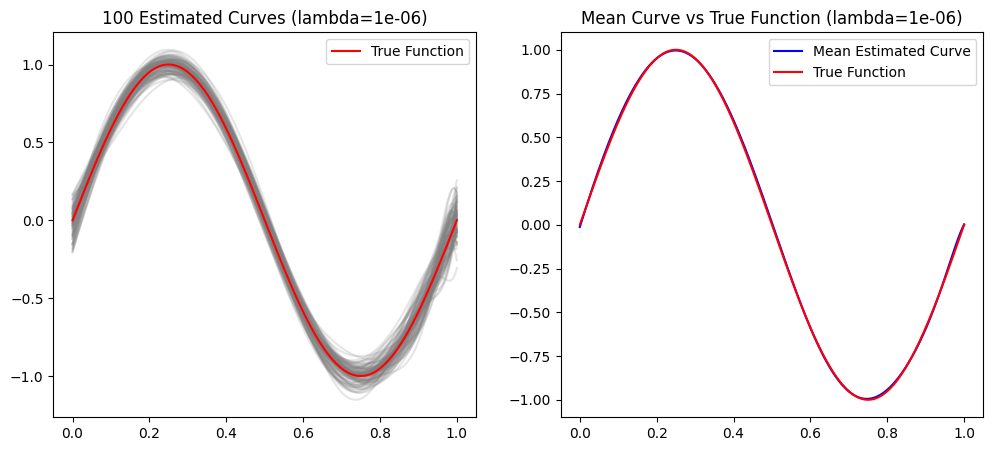

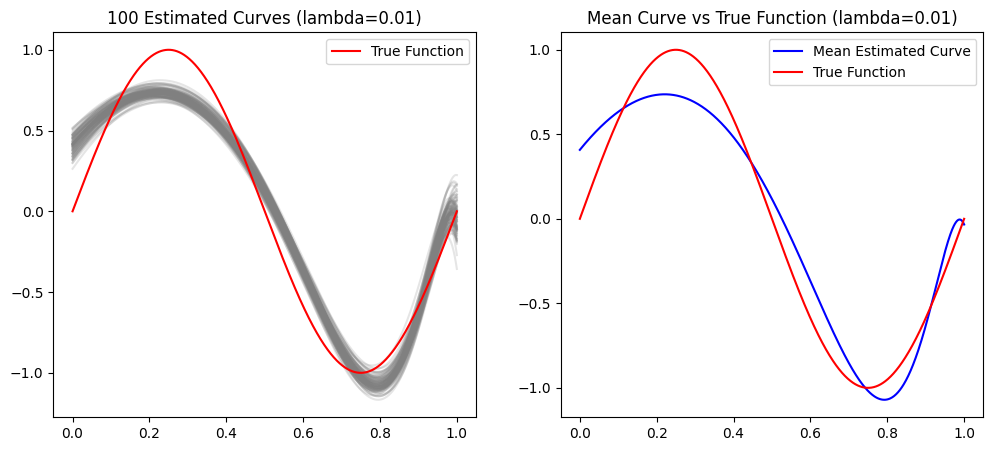

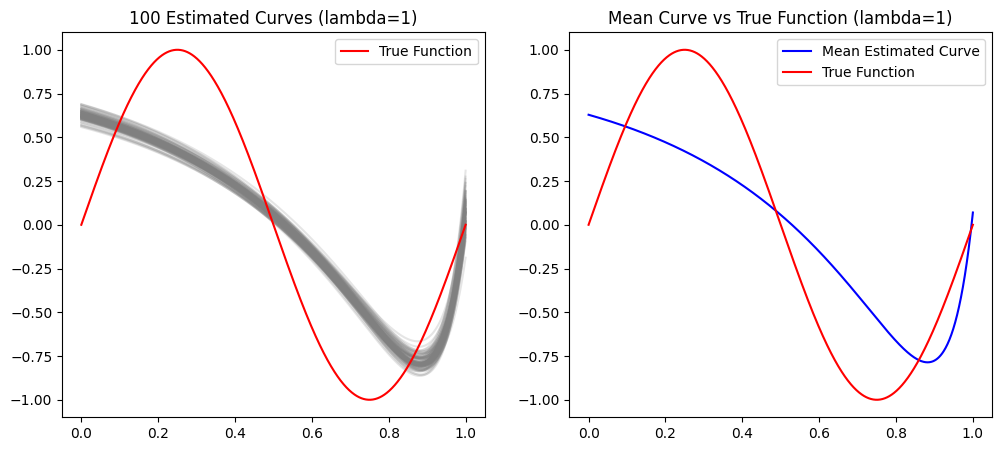

In [ ]:
#Understanding the bias-variance trade-off
########################################part 5########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
L = 100
N = 25
x = np.linspace(0, 1, N)
y_true = np.sin(2 * np.pi * x)
np.random.seed(42)
datasets = [y_true + 0.1 * np.random.randn(N) for _ in range(L)]

########################################
#Use regularized least squares to estimate w
########################################
M = 25
lambdas = [1e-6, 1e-2, 1] #low,mid,high

def fit_model(x, y, lamda):
    X = np.vander(x, N=M, increasing = True)
    I = np.eye(M)
    I[0,0] = 0
    w = np.linalg.solve(X.T @ X + lamda * I,  X.T @ y)
    return w

# def predict(x, w):
#     X_test = np.vander(x, N=M, increasing = True)
#     return X_test @ w


########################################
#Illustrate the concept of Bias-Variance trade off
########################################
#1. Chose three different regularization coefficeints (low,middle and high)
#2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
#3. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
#4. Using the six plots above, describe the bias-variance trade-off.

x_test = np.linspace(0, 1, 1000)
X_test = np.vander(x_test, N=M, increasing = True)
y_test_true = np.sin(2 * np.pi * x_test)
preds = {}

for lambda_ in lambdas:
    preds[lambda_] = []
    for i in range(L):
        w = fit_model(x, datasets[i], lambda_)
        preds[lambda_].append(X_test @ w)

for i,lambda_ in enumerate(lambdas):
    plt.figure(figsize=(12, 5))

    # Plot all estimated curves
    plt.subplot(1, 2, 1)
    for pred in preds[lambda_]:
        plt.plot(x_test, pred, color='gray', alpha=0.2)
    plt.plot(x_test, y_test_true, 'r-', label='True Function')
    plt.title(f'100 Estimated Curves (lambda={lambda_})')
    plt.legend()

    # Plot mean estimated curve with true function
    plt.subplot(1, 2, 2)
    mean_curve = np.mean(preds[lambda_], axis=0)
    plt.plot(x_test, mean_curve, 'b-', label='Mean Estimated Curve')
    plt.plot(x_test, y_test_true, 'r-', label='True Function')
    plt.title(f'Mean Curve vs True Function (lambda={lambda_})')
    plt.legend()

    plt.show()






<b> Report your observations </b>

1.

2.

3.



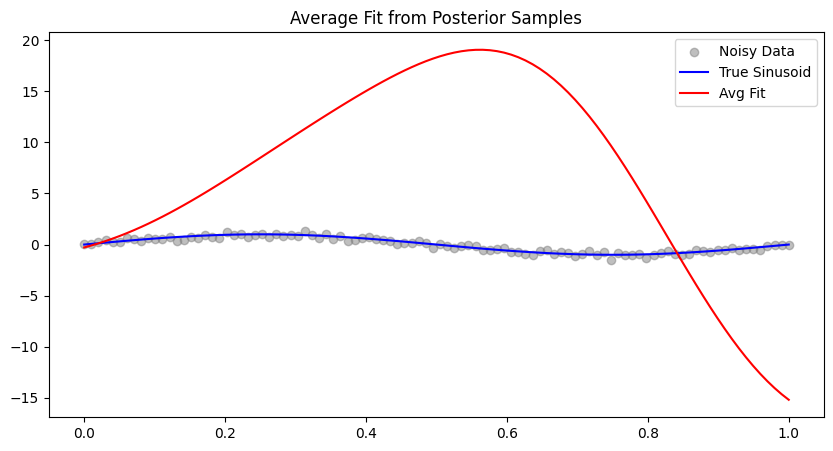

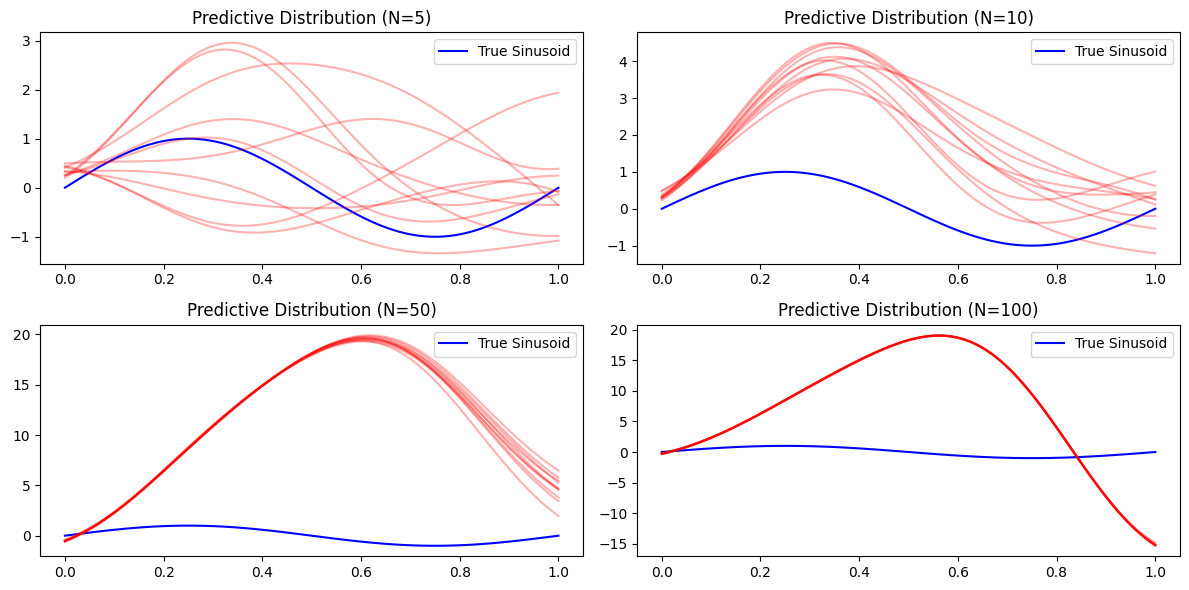

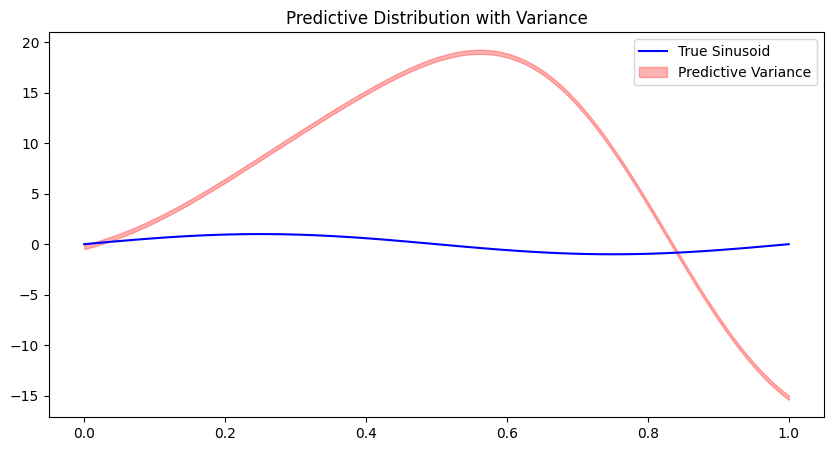

In [ ]:
#Understanding MAP estimate
########################################part 6 ###################################
#Generate 100 data sets of noisy sinusoidal data
########################################
np.random.seed(42)
N = 100
x = np.linspace(0, 1, N)
y_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.2, N)
y_noisy = y_true + noise

def gaussian_basis(x, mu, sigma=0.2):
    return np.exp(-((x[:, None] - mu[None, :]) ** 2) / (2 * sigma ** 2))

M = 20
mu = np.linspace(0, 2 * np.pi, M)
sigma = 0.2
X = gaussian_basis(x, mu, sigma)

########################################
#Update the statistics of posterior density
########################################
#Initialie the parameters for standard normal prior
alpha = 1
beta = 25
S_N_inv = alpha * np.eye(M)
m_N = np.zeros(M)

#Iterate through the data points and update the stats of posterior density

def update_posterior(X_n, t_n, S_N_inv, m_N):
    S_N_inv += beta*np.outer(X_n, X_n)
    S_N = np.linalg.inv(S_N_inv)
    m_N =  S_N @ (S_N_inv @ m_N + beta * X_n * t_n)
    return S_N_inv, m_N

for i in range(N):
    S_N_inv, m_N = update_posterior(X[i], y_noisy[i], S_N_inv, m_N)

S_N = np.linalg.inv(S_N_inv)
########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
numbers_samples = 100
y_samples = np.zeros((numbers_samples, N))

for i in range(numbers_samples):
    w_sample = np.random.multivariate_normal(m_N, S_N)
    y_samples[i] = X @ w_sample

avg_fit = np.mean(y_samples, axis = 0)

plt.figure(figsize=(10, 5))
plt.scatter(x, y_noisy, label="Noisy Data", color="gray", alpha=0.5)
plt.plot(x, y_true, label="True Sinusoid", color="blue")
plt.plot(x, avg_fit, label="Avg Fit", color="red")
plt.legend()
plt.title("Average Fit from Posterior Samples")
plt.show()


########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves

num_data_points = [5, 10, 50, 100]
plt.figure(figsize=(12, 6))
for i, num in enumerate(num_data_points):
    S_N_inv = alpha * np.eye(M)
    m_N = np.zeros(M)
    for j in range(num):
        S_N_inv, m_N = update_posterior(X[j], y_noisy[j], S_N_inv, m_N)
    S_N = np.linalg.inv(S_N_inv)
    y_samples = np.array([X @ np.random.multivariate_normal(m_N, S_N) for _ in range(10)])

    plt.subplot(2, 2, i + 1)
    plt.plot(x, y_true, 'b', label="True Sinusoid")
    for y in y_samples:
        plt.plot(x, y, 'r', alpha=0.3)
    plt.title(f"Predictive Distribution (N={num})")
    plt.legend()
plt.tight_layout()
plt.show()



#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class

y_pred = X @ m_N
y_var = np.sum(X @ S_N * X, axis=1) + 1 / beta

plt.figure(figsize=(10, 5))
plt.plot(x, y_true, 'b', label="True Sinusoid")
plt.fill_between(x, y_pred - np.sqrt(y_var), y_pred + np.sqrt(y_var), color='red', alpha=0.3, label="Predictive Variance")
plt.legend()
plt.title("Predictive Distribution with Variance")
plt.show()




<b> Report your observations </b>

1.

2.

3.

